In [130]:
import os
import dill
import itertools
import functools
import regex
import glob
import copy
from pathlib import Path

import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
sns.set()
from fastai import *
from fastai.tabular import *
import torch
# import tensorflow as tf
# from tensorflow import keras

%matplotlib inline

In [79]:
PATH = Path("E:\Intel Python HackFury 2\data\LIN")

## LR 0100 + LR 0300 (Basic radiation and other radiation measurements)

In [80]:
files = glob.glob(os.path.join(PATH.as_posix(), "*_0100.txt"))  # radioso
basic_radiation = []
for f in files:

    frame = pd.read_csv(f, delimiter='\t', infer_datetime_format=True, parse_dates=[0,])
    basic_radiation.append(frame)
basic_radiation = pd.concat(basic_radiation)

In [81]:
basic_radiation.index = np.arange(len(basic_radiation))

In [82]:
basic_radiation

Date/Time  Latitude  Longitude  \
0       2015-01-01 00:00:00     52.21     14.122   
1       2015-01-01 00:01:00     52.21     14.122   
2       2015-01-01 00:02:00     52.21     14.122   
3       2015-01-01 00:03:00     52.21     14.122   
4       2015-01-01 00:04:00     52.21     14.122   
...                     ...       ...        ...   
1052635 2016-12-31 23:55:00     52.21     14.122   
1052636 2016-12-31 23:56:00     52.21     14.122   
1052637 2016-12-31 23:57:00     52.21     14.122   
1052638 2016-12-31 23:58:00     52.21     14.122   
1052639 2016-12-31 23:59:00     52.21     14.122   

         Short-wave downward (GLOBAL) radiation [W/m**2]  \
0                                                    1.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    1.0   
...                                                  ...   
1052635                                              0.0   
1052636                                              0.0   
1052637                                              0.0   
1052638                                              0.0   
1052639                                              0.0   

         Direct radiation [W/m**2]  Diffuse radiation [W/m**2]  \
0                              0.0                         1.0   
1                              0.0                         1.0   
2                              0.0                         1.0   
3                              0.0                         1.0   
4                              0.0                         1.0   
...                            ...                         ...   
1052635                        0.0                         1.0   
1052636                        0.0                         1.0   
1052637                        0.0                         1.0   
1052638                        0.0                         1.0   
1052639                        0.0                         1.0   

         Long-wave downward radiation [W/m**2]  Air temperature [deg C]  \
0                                        335.0                      3.9   
1                                        335.0                      3.9   
2                                        335.0                      3.9   
3                                        335.0                      4.0   
4                                        335.0                      3.9   
...                                        ...                      ...   
1052635                                  325.0                      1.7   
1052636                                  324.0                      1.7   
1052637                                  324.0                      1.7   
1052638                                  325.0                      1.7   
1052639                                  324.0                      1.7   

         Humidity, relative [%]  Station pressure [hPa]  
0                          99.0                  1013.0  
1                          99.0                  1013.0  
2                          99.0                  1013.0  
3                          99.0                  1013.0  
4                          99.0                  1013.0  
...                         ...                     ...  
1052635                    91.0                  1006.0  
1052636                    90.0                  1006.0  
1052637                    90.0                  1006.0  
1052638                    90.0                  1006.0  
1052639                    90.0                  1006.0  

[1052640 rows x 10 columns]

In [83]:
basic_radiation['Date/Time']

0         2015-01-01 00:00:00
1         2015-01-01 00:01:00
2         2015-01-01 00:02:00
3         2015-01-01 00:03:00
4         2015-01-01 00:04:00
                  ...        
1052635   2016-12-31 23:55:00
1052636   2016-12-31 23:56:00
1052637   2016-12-31 23:57:00
1052638   2016-12-31 23:58:00
1052639   2016-12-31 23:59:00
Name: Date/Time, Length: 1052640, dtype: datetime64[ns]

## LR 1100 (Radiosonde measurements)

In [84]:

files = glob.glob(os.path.join(PATH.as_posix(), "*_1100.txt"))  # radioso
radiosonde = []
for f in files:

    frame = pd.read_csv(f, delimiter='\t', infer_datetime_format=True, parse_dates=[1,])
    radiosonde.append(frame)
radiosonde = pd.concat(radiosonde)

In [85]:
radiosonde.columns

Index(['Station', 'Date/Time', 'Latitude', 'Longitude', 'Altitude [m]',
       'Pressure, at given altitude [hPa]', 'Temperature, air [deg C]',
       'Dew/frost point [deg C]', 'Wind direction [deg]', 'Wind speed [m/sec]',
       'Ozone [mPa]'],
      dtype='object')

In [86]:
radiosonde.index = np.arange(len(radiosonde))

In [87]:
radiosonde

Station           Date/Time  Latitude  Longitude  Altitude [m]  \
0           LIN 2015-01-01 00:00:00     52.21     14.122           112   
1           LIN 2015-01-01 00:00:00     52.21     14.122           121   
2           LIN 2015-01-01 00:00:00     52.21     14.122           133   
3           LIN 2015-01-01 00:00:00     52.21     14.122           146   
4           LIN 2015-01-01 00:00:00     52.21     14.122           157   
...         ...                 ...       ...        ...           ...   
8867125     LIN 2016-12-31 18:00:00     52.21     14.122         29418   
8867126     LIN 2016-12-31 18:00:00     52.21     14.122         29428   
8867127     LIN 2016-12-31 18:00:00     52.21     14.122         29439   
8867128     LIN 2016-12-31 18:00:00     52.21     14.122         29451   
8867129     LIN 2016-12-31 18:00:00     52.21     14.122         29461   

         Pressure, at given altitude [hPa]  Temperature, air [deg C]  \
0                                     1017                       3.5   
1                                     1016                       3.4   
2                                     1015                       3.6   
3                                     1013                       3.6   
4                                     1012                       3.7   
...                                    ...                       ...   
8867125                                 10                     -68.8   
8867126                                 10                     -68.8   
8867127                                 10                     -68.9   
8867128                                 10                     -69.0   
8867129                                 10                     -69.1   

         Dew/frost point [deg C]  Wind direction [deg]  Wind speed [m/sec]  \
0                            3.5                 270.0                 5.0   
1                            3.4                 282.0                 3.0   
2                            3.6                 283.0                 3.0   
3                            3.6                 282.0                 4.0   
4                            3.7                 281.0                 5.0   
...                          ...                   ...                 ...   
8867125                    -96.0                 281.0                53.0   
8867126                    -96.0                 281.0                53.0   
8867127                    -96.1                 281.0                53.0   
8867128                      NaN                 281.0                53.0   
8867129                    -96.2                 280.0                54.0   

         Ozone [mPa]  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
8867125          NaN  
8867126          NaN  
8867127          NaN  
8867128          NaN  
8867129          NaN  

[8867130 rows x 11 columns]

In [88]:
radiosonde['Date/Time']

0         2015-01-01 00:00:00
1         2015-01-01 00:00:00
2         2015-01-01 00:00:00
3         2015-01-01 00:00:00
4         2015-01-01 00:00:00
                  ...        
8867125   2016-12-31 18:00:00
8867126   2016-12-31 18:00:00
8867127   2016-12-31 18:00:00
8867128   2016-12-31 18:00:00
8867129   2016-12-31 18:00:00
Name: Date/Time, Length: 8867130, dtype: datetime64[ns]

## LR 1000 (Meteorological synoptical observations)

In [89]:
files = glob.glob(os.path.join(PATH.as_posix(), "*_1000.txt"))
synoptical = []
for f in files:

    frame = pd.read_csv(f, delimiter='\t', infer_datetime_format=True, parse_dates=[1,])
    synoptical.append(frame)
synoptical = pd.concat(synoptical)

In [90]:
synoptical['Date/Time']

0     2015-01-01 00:00:00
1     2015-01-01 01:00:00
2     2015-01-01 02:00:00
3     2015-01-01 03:00:00
4     2015-01-01 04:00:00
              ...        
739   2016-12-31 19:00:00
740   2016-12-31 20:00:00
741   2016-12-31 21:00:00
742   2016-12-31 22:00:00
743   2016-12-31 23:00:00
Name: Date/Time, Length: 17544, dtype: datetime64[ns]

In [91]:
synoptical.index = np.arange(len(synoptical))

## LR 1200 (Ozone measurements)

In [92]:
files = glob.glob(os.path.join(PATH.as_posix(), "*_1200.txt"))  # radioso
ozone = []
for f in files:

    frame = pd.read_csv(f, delimiter='\t', infer_datetime_format=True, parse_dates=[1,])
    ozone.append(frame)
ozone = pd.concat(ozone)

In [93]:
ozone.index = np.arange(len(ozone))
ozone

Station  Date/Time  Latitude  Longitude  Ozone total [DU]
0       LIN 2015-01-01     52.21     14.122               291
1       LIN 2015-01-02     52.21     14.122               313
2       LIN 2015-01-03     52.21     14.122               340
3       LIN 2015-01-04     52.21     14.122               363
4       LIN 2015-01-05     52.21     14.122               333
..      ...        ...       ...        ...               ...
720     LIN 2016-12-27     52.21     14.122               370
721     LIN 2016-12-28     52.21     14.122               256
722     LIN 2016-12-29     52.21     14.122               305
723     LIN 2016-12-30     52.21     14.122               278
724     LIN 2016-12-31     52.21     14.122               262

[725 rows x 5 columns]

In [94]:
ozone['Date/Time']

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
720   2016-12-27
721   2016-12-28
722   2016-12-29
723   2016-12-30
724   2016-12-31
Name: Date/Time, Length: 725, dtype: datetime64[ns]

## LR 1300 (Expanded measurements), Part I

In [95]:
#PATH = Path("C:/Users/Abhij/Documents/")
files = glob.glob(os.path.join(PATH.as_posix(), "*_1300.txt"))  # radioso
expanded_measurements = []
for f in files:

    frame = pd.read_csv(f, delimiter='\t', infer_datetime_format=True, parse_dates=[1,])
    expanded_measurements.append(frame)
expanded_measurements = pd.concat(expanded_measurements)

In [96]:
expanded_measurements.index = np.arange(len(expanded_measurements))

In [97]:
expanded_measurements

Station           Date/Time  Latitude  Longitude  Cloud base height [m]
0         LIN 2015-01-01 00:00:00     52.21     14.122                     15
1         LIN 2015-01-01 00:10:00     52.21     14.122                     15
2         LIN 2015-01-01 00:20:00     52.21     14.122                     15
3         LIN 2015-01-01 00:30:00     52.21     14.122                     15
4         LIN 2015-01-01 00:40:00     52.21     14.122                     15
...       ...                 ...       ...        ...                    ...
92786     LIN 2016-12-31 23:10:00     52.21     14.122                    279
92787     LIN 2016-12-31 23:20:00     52.21     14.122                    286
92788     LIN 2016-12-31 23:30:00     52.21     14.122                    489
92789     LIN 2016-12-31 23:40:00     52.21     14.122                    485
92790     LIN 2016-12-31 23:50:00     52.21     14.122                    463

[92791 rows x 5 columns]

## Export csv

In [21]:
basic_radiation.to_csv("./basic_radiation.csv")

In [22]:
radiosonde.to_csv("./radiationsonde.csv")

In [23]:
synoptical.to_csv("./synoptical.csv")

In [24]:
ozone.to_csv("./ozone.csv")

In [25]:
expanded_measurements.to_csv("./expanded_measurements.csv")

## Read Csvs

In [36]:
basic_radiation = pd.read_csv("./basic_radiation.csv", index_col=0)
radiosonde = pd.read_csv("./radiationsonde.csv", index_col=0)
synoptical = pd.read_csv("./synoptical.csv", index_col=0)
ozone = pd.read_csv("./ozone.csv", index_col=0)
expanded_measurements = pd.read_csv("./expanded_measurements.csv", index_col=0)

C:\Users\Abhij\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Data Cleaning

In [98]:
basic_radiation.isna().sum()

Date/Time                                               0
Latitude                                                0
Longitude                                               0
Short-wave downward (GLOBAL) radiation [W/m**2]       110
Direct radiation [W/m**2]                            4642
Diffuse radiation [W/m**2]                           2110
Long-wave downward radiation [W/m**2]                1037
Air temperature [deg C]                                28
Humidity, relative [%]                                 28
Station pressure [hPa]                             168182
dtype: int64

In [99]:
basic_radiation.fillna(method='ffill',axis=0,inplace=True)

In [100]:
ozone.drop(labels=['Latitude', 'Longitude', 'Station'], axis=1, inplace=True)

In [101]:
ozone

Date/Time  Ozone total [DU]
0   2015-01-01               291
1   2015-01-02               313
2   2015-01-03               340
3   2015-01-04               363
4   2015-01-05               333
..         ...               ...
720 2016-12-27               370
721 2016-12-28               256
722 2016-12-29               305
723 2016-12-30               278
724 2016-12-31               262

[725 rows x 2 columns]

In [102]:
ozone.isna().sum(axis=0)

Date/Time           0
Ozone total [DU]    0
dtype: int64

In [103]:
expanded_measurements.drop(labels=['Latitude', 'Longitude', 'Station'], axis=1, inplace=True)

In [104]:
expanded_measurements.reset_index(inplace=True)

In [107]:
expanded_measurements.drop(columns=[ 'index'], inplace=True)

In [108]:
expanded_measurements

Date/Time  Cloud base height [m]
0     2015-01-01 00:00:00                     15
1     2015-01-01 00:10:00                     15
2     2015-01-01 00:20:00                     15
3     2015-01-01 00:30:00                     15
4     2015-01-01 00:40:00                     15
...                   ...                    ...
92786 2016-12-31 23:10:00                    279
92787 2016-12-31 23:20:00                    286
92788 2016-12-31 23:30:00                    489
92789 2016-12-31 23:40:00                    485
92790 2016-12-31 23:50:00                    463

[92791 rows x 2 columns]

In [109]:
basic_radiation.drop(labels=['Latitude', 'Longitude'], axis=1, inplace=True)

In [110]:
basic_radiation['Direct radiation [W/m**2]'].unique()

array([   0.,    2.,    1., ...,  997.,  994., 1000.])

In [111]:
radiosonde.drop(labels=['Latitude', 'Longitude', 'Station','Ozone [mPa]'], axis=1, inplace=True)

In [112]:
radiosonde.groupby("Date/Time").agg({"Pressure, at given altitude [hPa]":(np.std, np.mean)
                                     , "Temperature, air [deg C]": (np.std, np.mean)})

Pressure, at given altitude [hPa]              \
                                                  std        mean   
Date/Time                                                           
2015-01-01 00:00:00                        272.228550  404.915580   
2015-01-01 06:00:00                        269.419265  239.244411   
2015-01-01 12:00:00                        265.619559  228.029648   
2015-01-01 18:00:00                        271.022500  242.882543   
2015-01-02 00:00:00                        273.013982  238.576564   
...                                               ...         ...   
2016-12-30 18:00:00                        272.289724  262.420725   
2016-12-31 00:00:00                        267.313973  220.869010   
2016-12-31 06:00:00                        270.573822  248.266712   
2016-12-31 12:00:00                        269.675498  257.962414   
2016-12-31 18:00:00                        270.648147  255.660137   

                    Temperature, air [deg C]             
                                         std       mean  
Date/Time                                                
2015-01-01 00:00:00                25.722956 -36.580920  
2015-01-01 06:00:00                23.242985 -49.502387  
2015-01-01 12:00:00                22.169560 -48.807659  
2015-01-01 18:00:00                23.418737 -47.986027  
2015-01-02 00:00:00                23.863922 -47.037677  
...                                      ...        ...  
2016-12-30 18:00:00                26.419221 -50.494473  
2016-12-31 00:00:00                25.319446 -53.225367  
2016-12-31 06:00:00                26.464667 -52.117381  
2016-12-31 12:00:00                26.679973 -51.437690  
2016-12-31 18:00:00                26.239807 -51.634948  

[2924 rows x 4 columns]

In [73]:
radiosonde

Date/Time  Altitude [m]  Pressure, at given altitude [hPa]  \
0       2015-01-01 00:00:00           112                               1017   
1       2015-01-01 00:00:00           121                               1016   
2       2015-01-01 00:00:00           133                               1015   
3       2015-01-01 00:00:00           146                               1013   
4       2015-01-01 00:00:00           157                               1012   
...                     ...           ...                                ...   
8867125 2016-12-31 18:00:00         29418                                 10   
8867126 2016-12-31 18:00:00         29428                                 10   
8867127 2016-12-31 18:00:00         29439                                 10   
8867128 2016-12-31 18:00:00         29451                                 10   
8867129 2016-12-31 18:00:00         29461                                 10   

         Temperature, air [deg C]  Dew/frost point [deg C]  \
0                             3.5                      3.5   
1                             3.4                      3.4   
2                             3.6                      3.6   
3                             3.6                      3.6   
4                             3.7                      3.7   
...                           ...                      ...   
8867125                     -68.8                    -96.0   
8867126                     -68.8                    -96.0   
8867127                     -68.9                    -96.1   
8867128                     -69.0                      NaN   
8867129                     -69.1                    -96.2   

         Wind direction [deg]  Wind speed [m/sec]  
0                       270.0                 5.0  
1                       282.0                 3.0  
2                       283.0                 3.0  
3                       282.0                 4.0  
4                       281.0                 5.0  
...                       ...                 ...  
8867125                 281.0                53.0  
8867126                 281.0                53.0  
8867127                 281.0                53.0  
8867128                 281.0                53.0  
8867129                 280.0                54.0  

[8867130 rows x 7 columns]

In [113]:
radiosonde['Hour'] = radiosonde['Date/Time'].dt.hour
radiosonde['Month'] = radiosonde['Date/Time'].dt.month
radiosonde['Day'] = radiosonde['Date/Time'].dt.day
radiosonde['Year'] = radiosonde['Date/Time'].dt.year

In [114]:
radiosonde

Date/Time  Altitude [m]  Pressure, at given altitude [hPa]  \
0       2015-01-01 00:00:00           112                               1017   
1       2015-01-01 00:00:00           121                               1016   
2       2015-01-01 00:00:00           133                               1015   
3       2015-01-01 00:00:00           146                               1013   
4       2015-01-01 00:00:00           157                               1012   
...                     ...           ...                                ...   
8867125 2016-12-31 18:00:00         29418                                 10   
8867126 2016-12-31 18:00:00         29428                                 10   
8867127 2016-12-31 18:00:00         29439                                 10   
8867128 2016-12-31 18:00:00         29451                                 10   
8867129 2016-12-31 18:00:00         29461                                 10   

         Temperature, air [deg C]  Dew/frost point [deg C]  \
0                             3.5                      3.5   
1                             3.4                      3.4   
2                             3.6                      3.6   
3                             3.6                      3.6   
4                             3.7                      3.7   
...                           ...                      ...   
8867125                     -68.8                    -96.0   
8867126                     -68.8                    -96.0   
8867127                     -68.9                    -96.1   
8867128                     -69.0                      NaN   
8867129                     -69.1                    -96.2   

         Wind direction [deg]  Wind speed [m/sec]  Hour  Month  Day  Year  
0                       270.0                 5.0     0      1    1  2015  
1                       282.0                 3.0     0      1    1  2015  
2                       283.0                 3.0     0      1    1  2015  
3                       282.0                 4.0     0      1    1  2015  
4                       281.0                 5.0     0      1    1  2015  
...                       ...                 ...   ...    ...  ...   ...  
8867125                 281.0                53.0    18     12   31  2016  
8867126                 281.0                53.0    18     12   31  2016  
8867127                 281.0                53.0    18     12   31  2016  
8867128                 281.0                53.0    18     12   31  2016  
8867129                 280.0                54.0    18     12   31  2016  

[8867130 rows x 11 columns]

In [115]:
basic_radiation.set_index('Date/Time', inplace=True)

In [88]:
ozone['Date/Time'].dt.hour

0      0
1      0
2      0
3      0
4      0
      ..
720    0
721    0
722    0
723    0
724    0
Name: Date/Time, Length: 725, dtype: int64

In [116]:
basic_radiation['Hour'] = basic_radiation.index.to_series().dt.hour
basic_radiation['Month'] = basic_radiation.index.to_series().dt.month
basic_radiation['Day'] = basic_radiation.index.to_series().dt.day
basic_radiation['Year'] = basic_radiation.index.to_series().dt.year

In [117]:
piv = pd.pivot_table(basic_radiation, values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Month"], fill_value=0)

In [118]:
basic_radiation.isnull().sum()

Short-wave downward (GLOBAL) radiation [W/m**2]    0
Direct radiation [W/m**2]                          0
Diffuse radiation [W/m**2]                         0
Long-wave downward radiation [W/m**2]              0
Air temperature [deg C]                            0
Humidity, relative [%]                             0
Station pressure [hPa]                             0
Hour                                               0
Month                                              0
Day                                                0
Year                                               0
dtype: int64

In [119]:
#df.loc[:,col] = df.loc[:,col].ffill()
basic_radiation.loc[:,basic_radiation.columns] = basic_radiation.loc[:,basic_radiation.columns].ffill()

## EDA

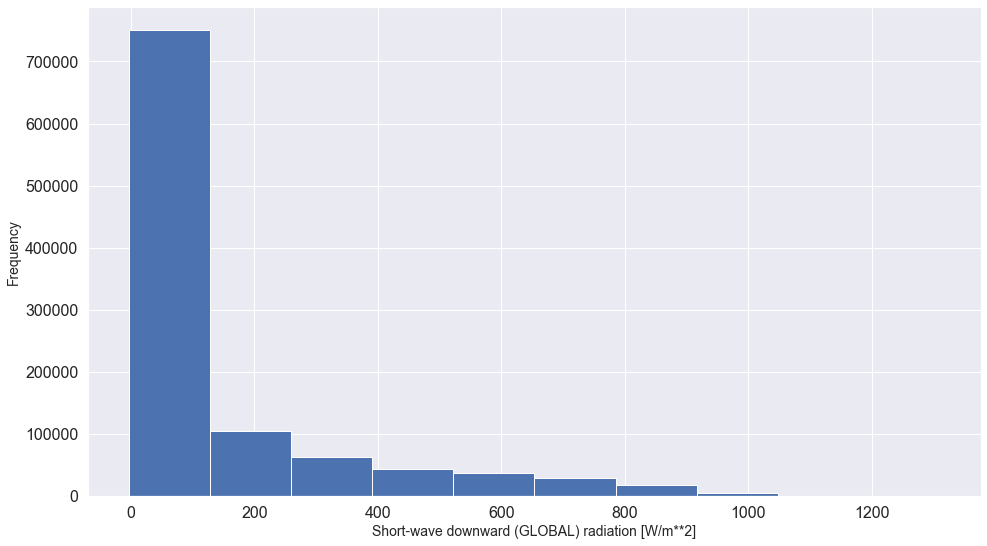

In [120]:
plt.figure(figsize=(16, 9))
basic_radiation['Short-wave downward (GLOBAL) radiation [W/m**2]'].plot(kind='hist', fontsize=16)
plt.xlabel('Short-wave downward (GLOBAL) radiation [W/m**2]', fontsize=14)
plt.ylabel('Frequency', fontsize=14);
#plt.figure(figsize=(16, 6))

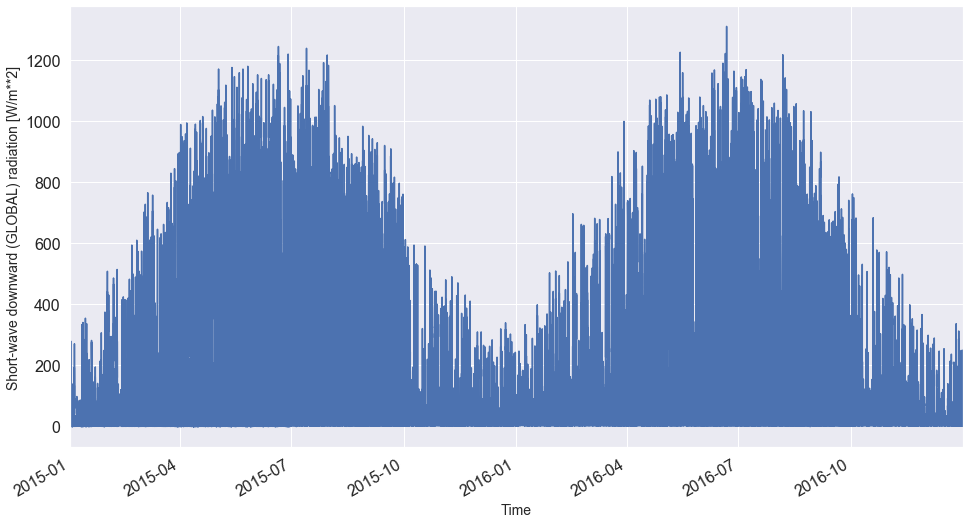

In [121]:
plt.figure(figsize=(16, 9))
sns.set()
basic_radiation['Short-wave downward (GLOBAL) radiation [W/m**2]'].plot(kind='line', fontsize=16,)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Short-wave downward (GLOBAL) radiation [W/m**2]', fontsize=14);

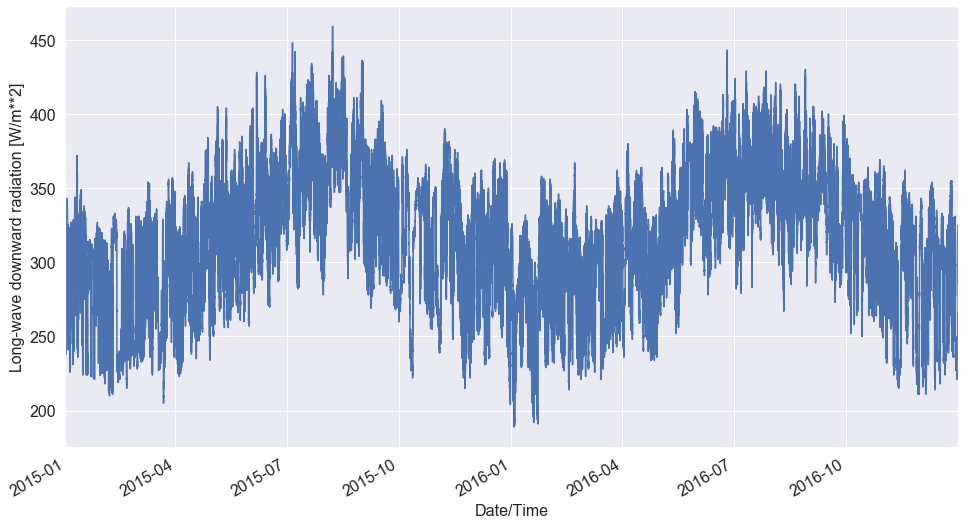

In [122]:
ax = basic_radiation['Long-wave downward radiation [W/m**2]'].plot(figsize=(16,9), fontsize=16)

ax.set_ylabel('Long-wave downward radiation [W/m**2]', fontsize=16)
ax.set_xlabel('Date/Time', fontsize=16);

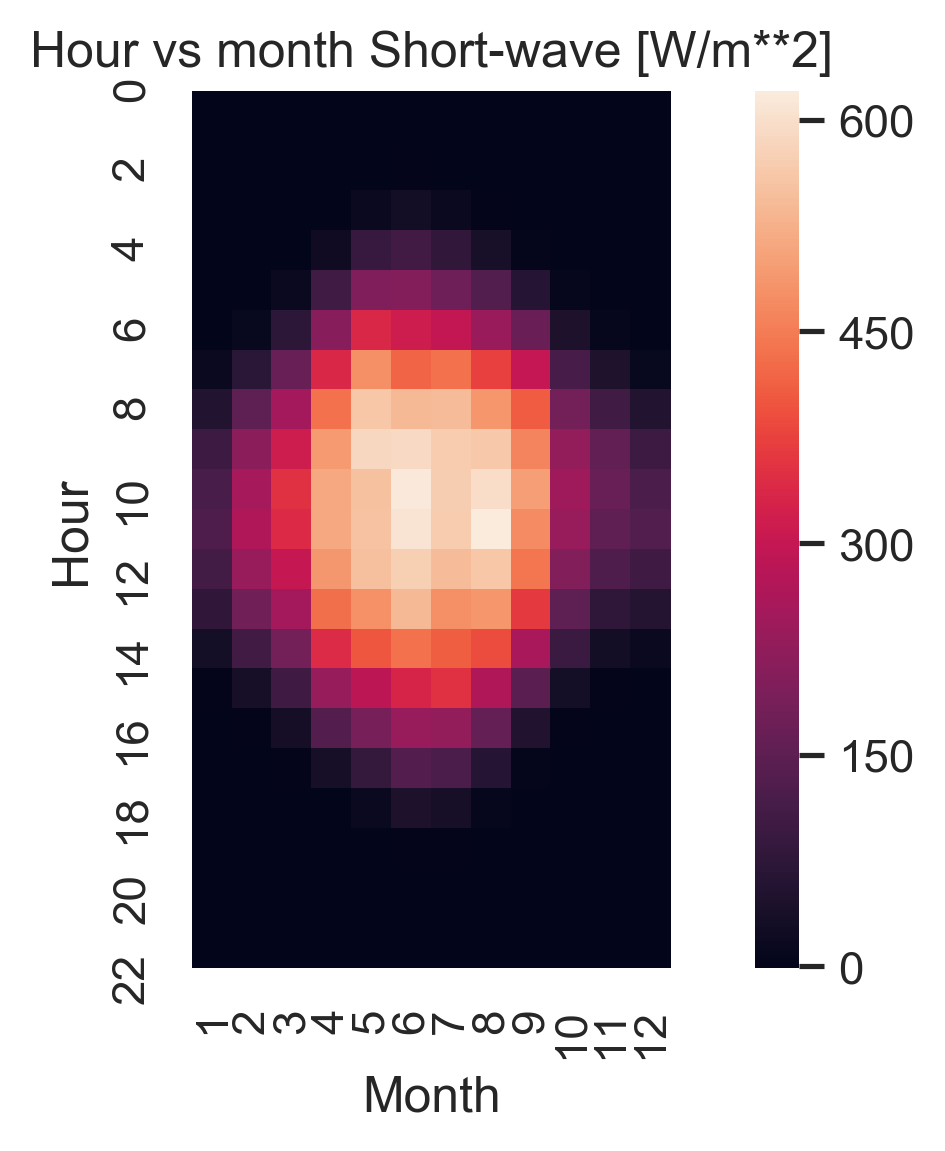

In [123]:
# plot pivot table as heatmap using seaborn
piv = pd.pivot_table(basic_radiation, values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Month"], fill_value=0)
plt.figure(dpi=300)
#sns.set_style("white")
#sns.set()
ax = sns.heatmap(piv, square=True, linewidths=0)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('Hour vs month Short-wave [W/m**2]')
plt.tight_layout()
plt.show()


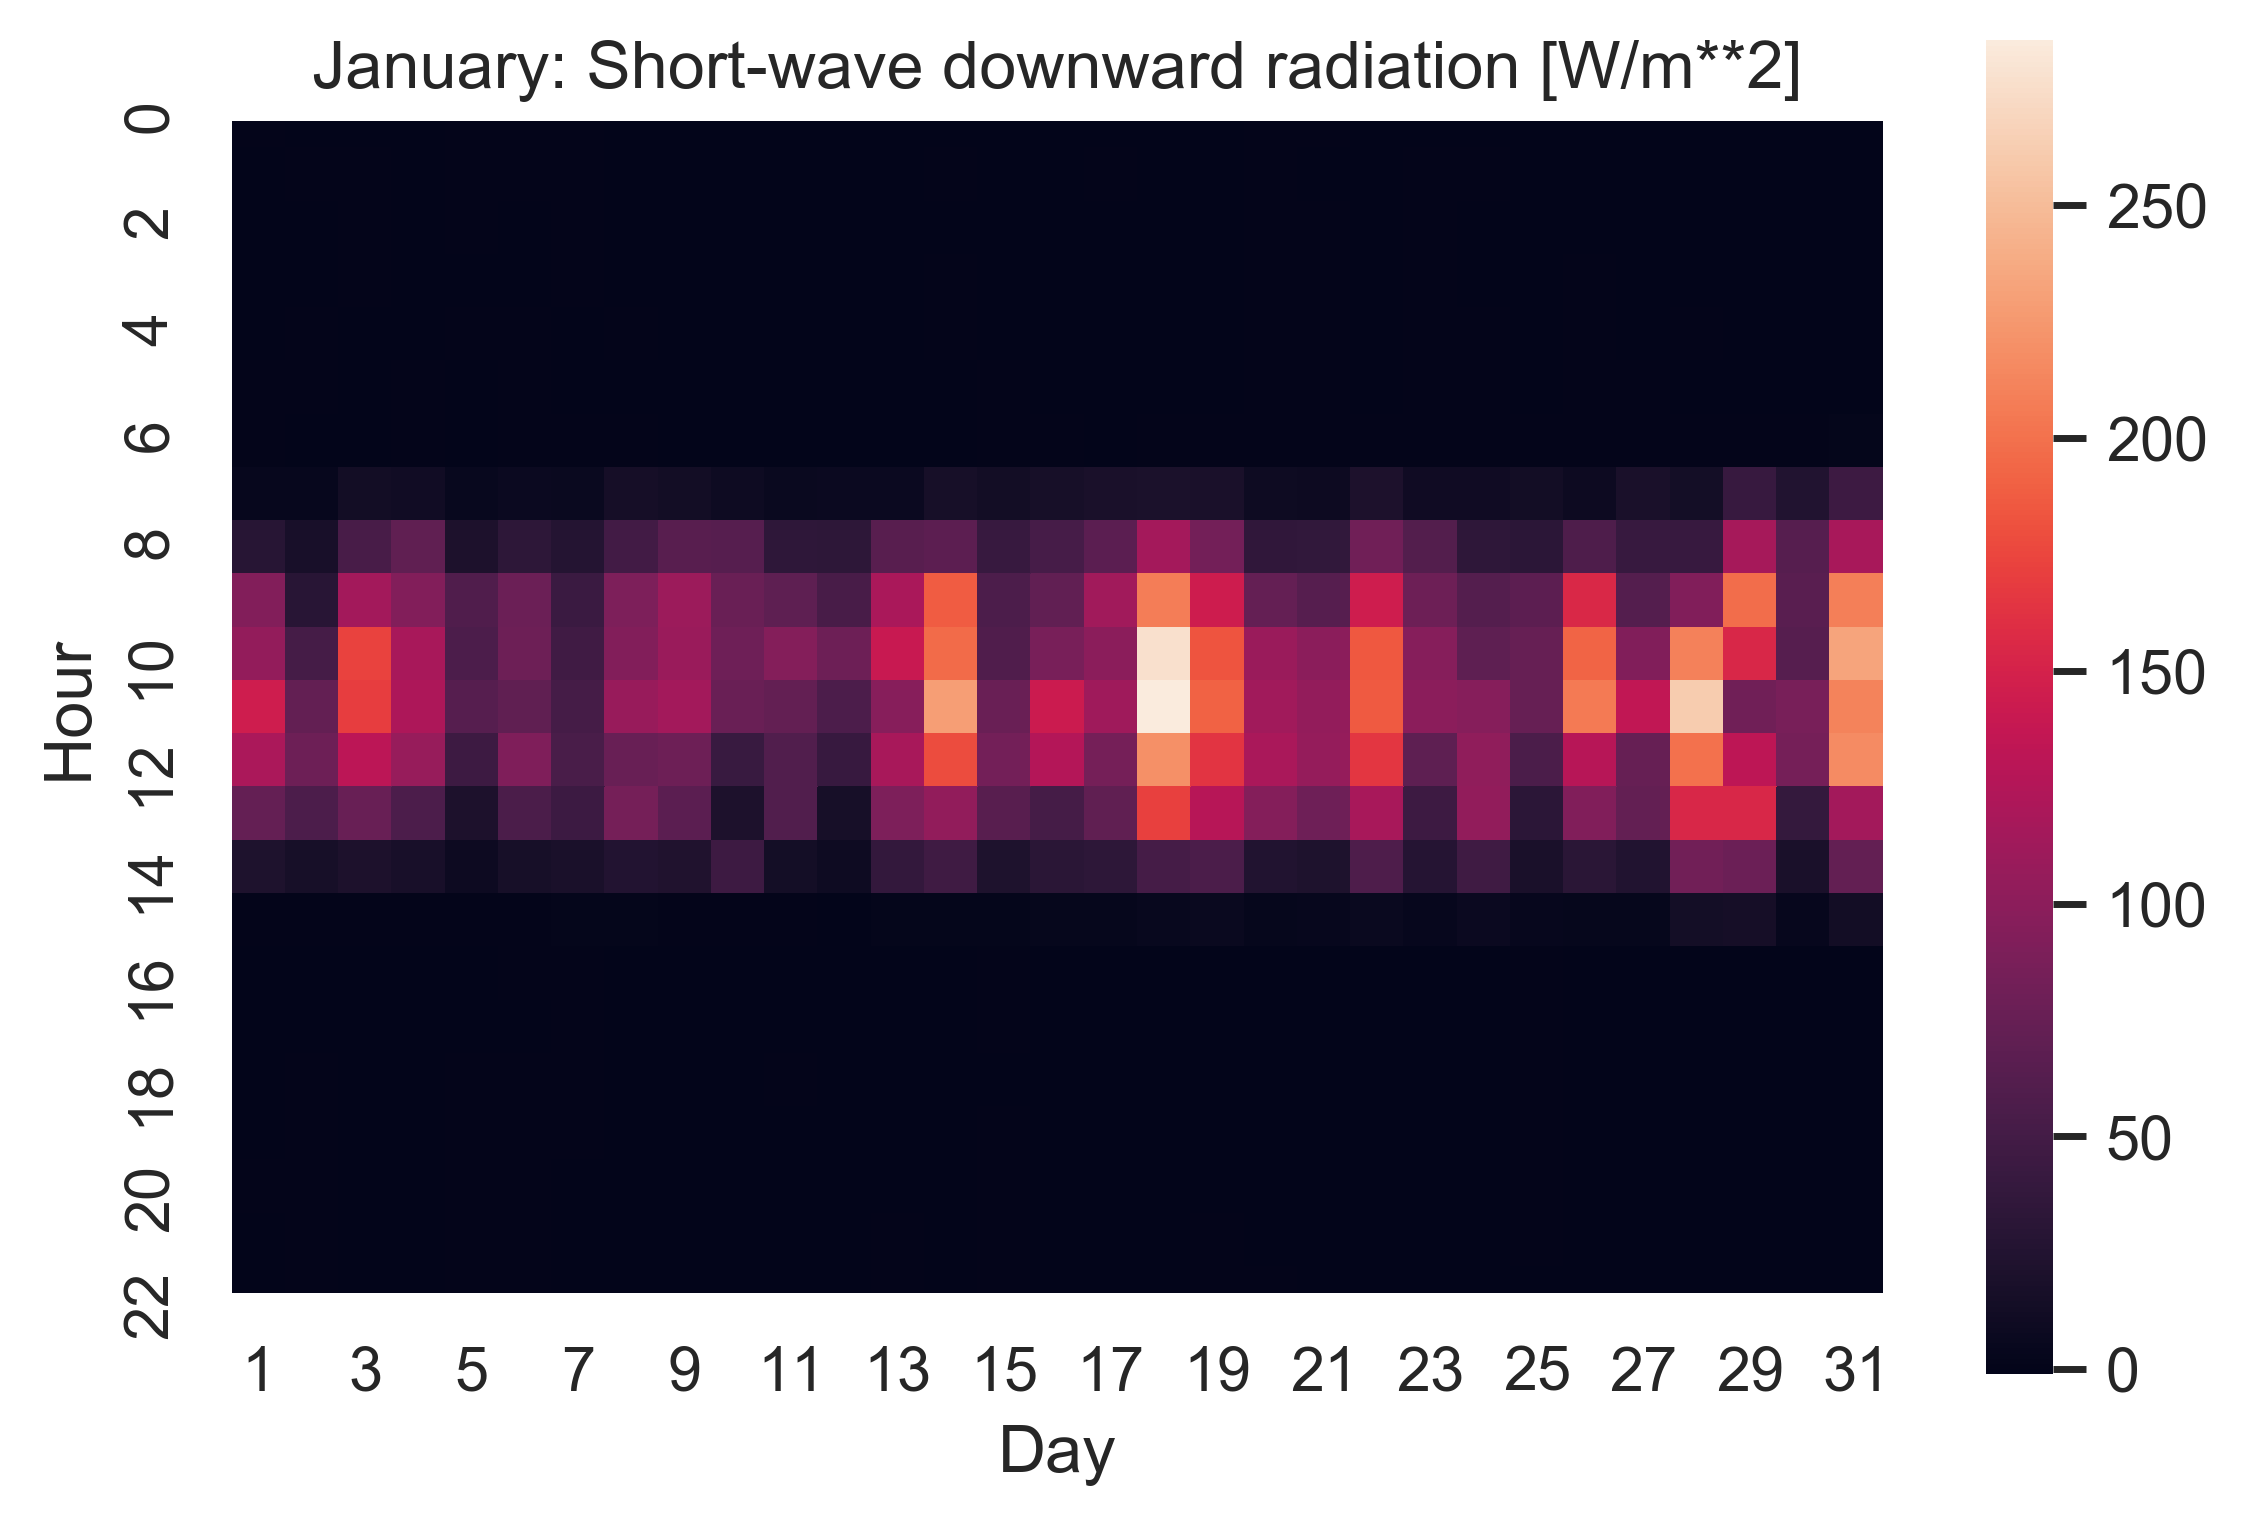

In [173]:

piv = pd.pivot_table(basic_radiation[basic_radiation['Month']==1], values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Day"], fill_value=0)
plt.figure(dpi=400)
ax = sns.heatmap(piv, square=True)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('January: Short-wave downward radiation [W/m**2]')
plt.tight_layout()
plt.show()

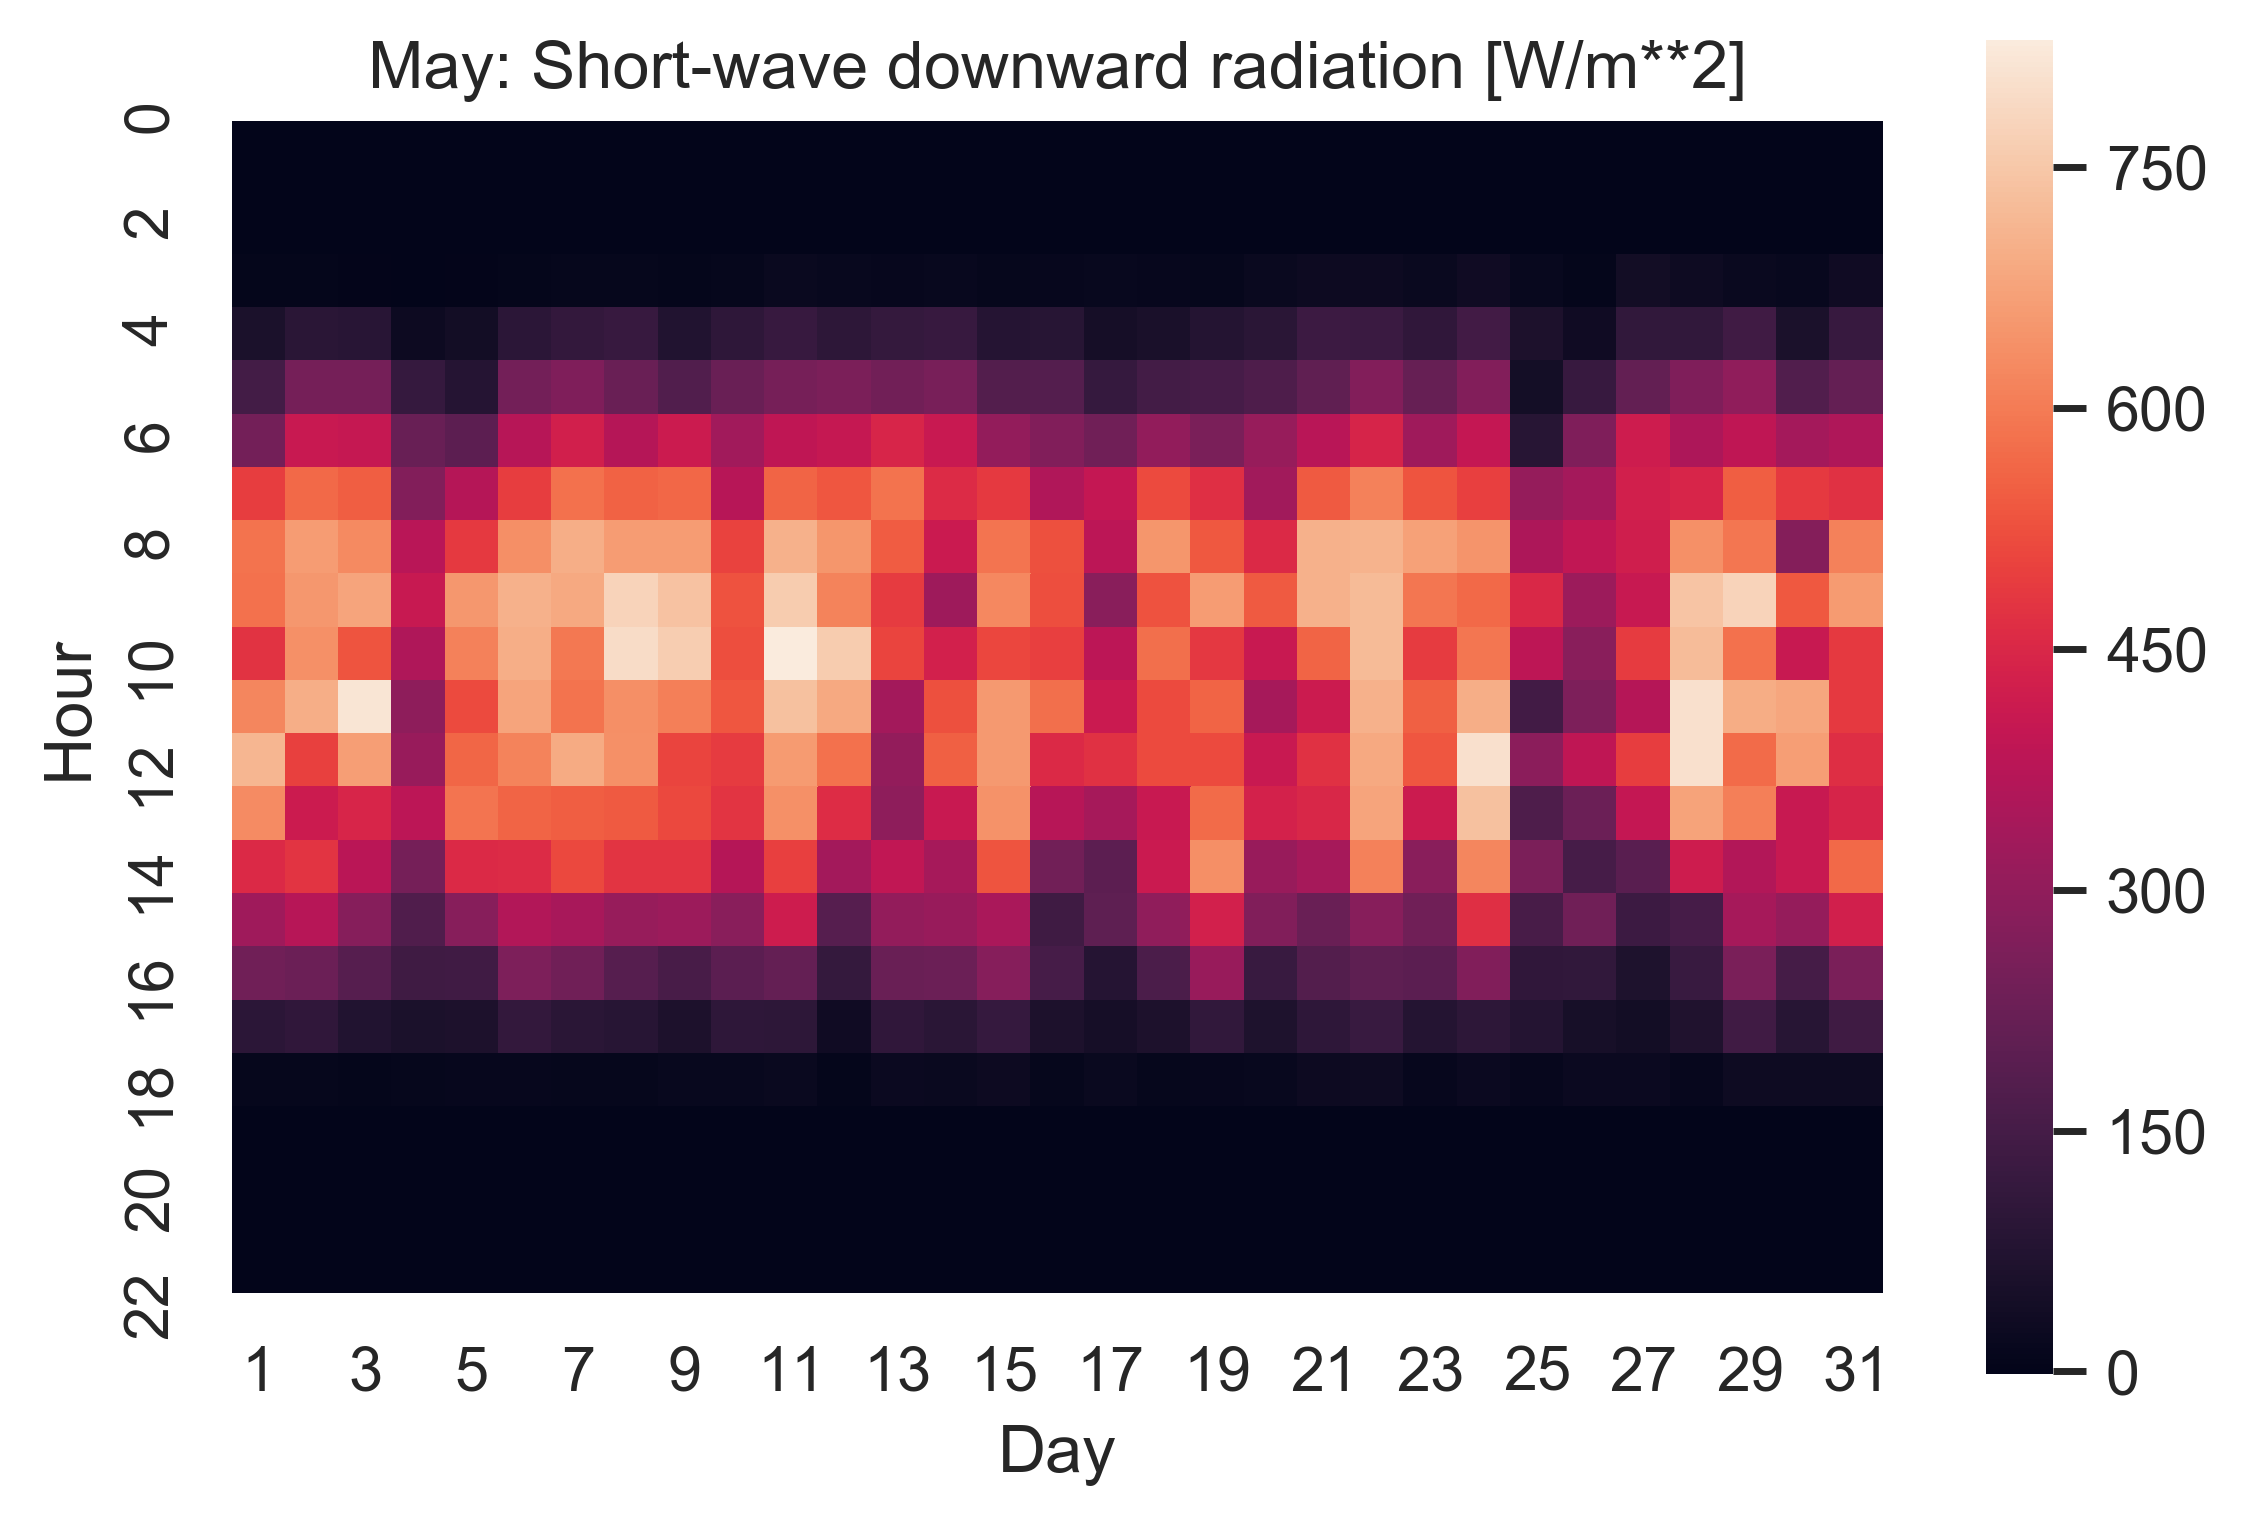

In [174]:

piv = pd.pivot_table(basic_radiation[basic_radiation['Month']==5], values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Day"], fill_value=0)
plt.figure(dpi=400)
ax = sns.heatmap(piv, square=True)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('May: Short-wave downward radiation [W/m**2]')
plt.tight_layout()
plt.show()

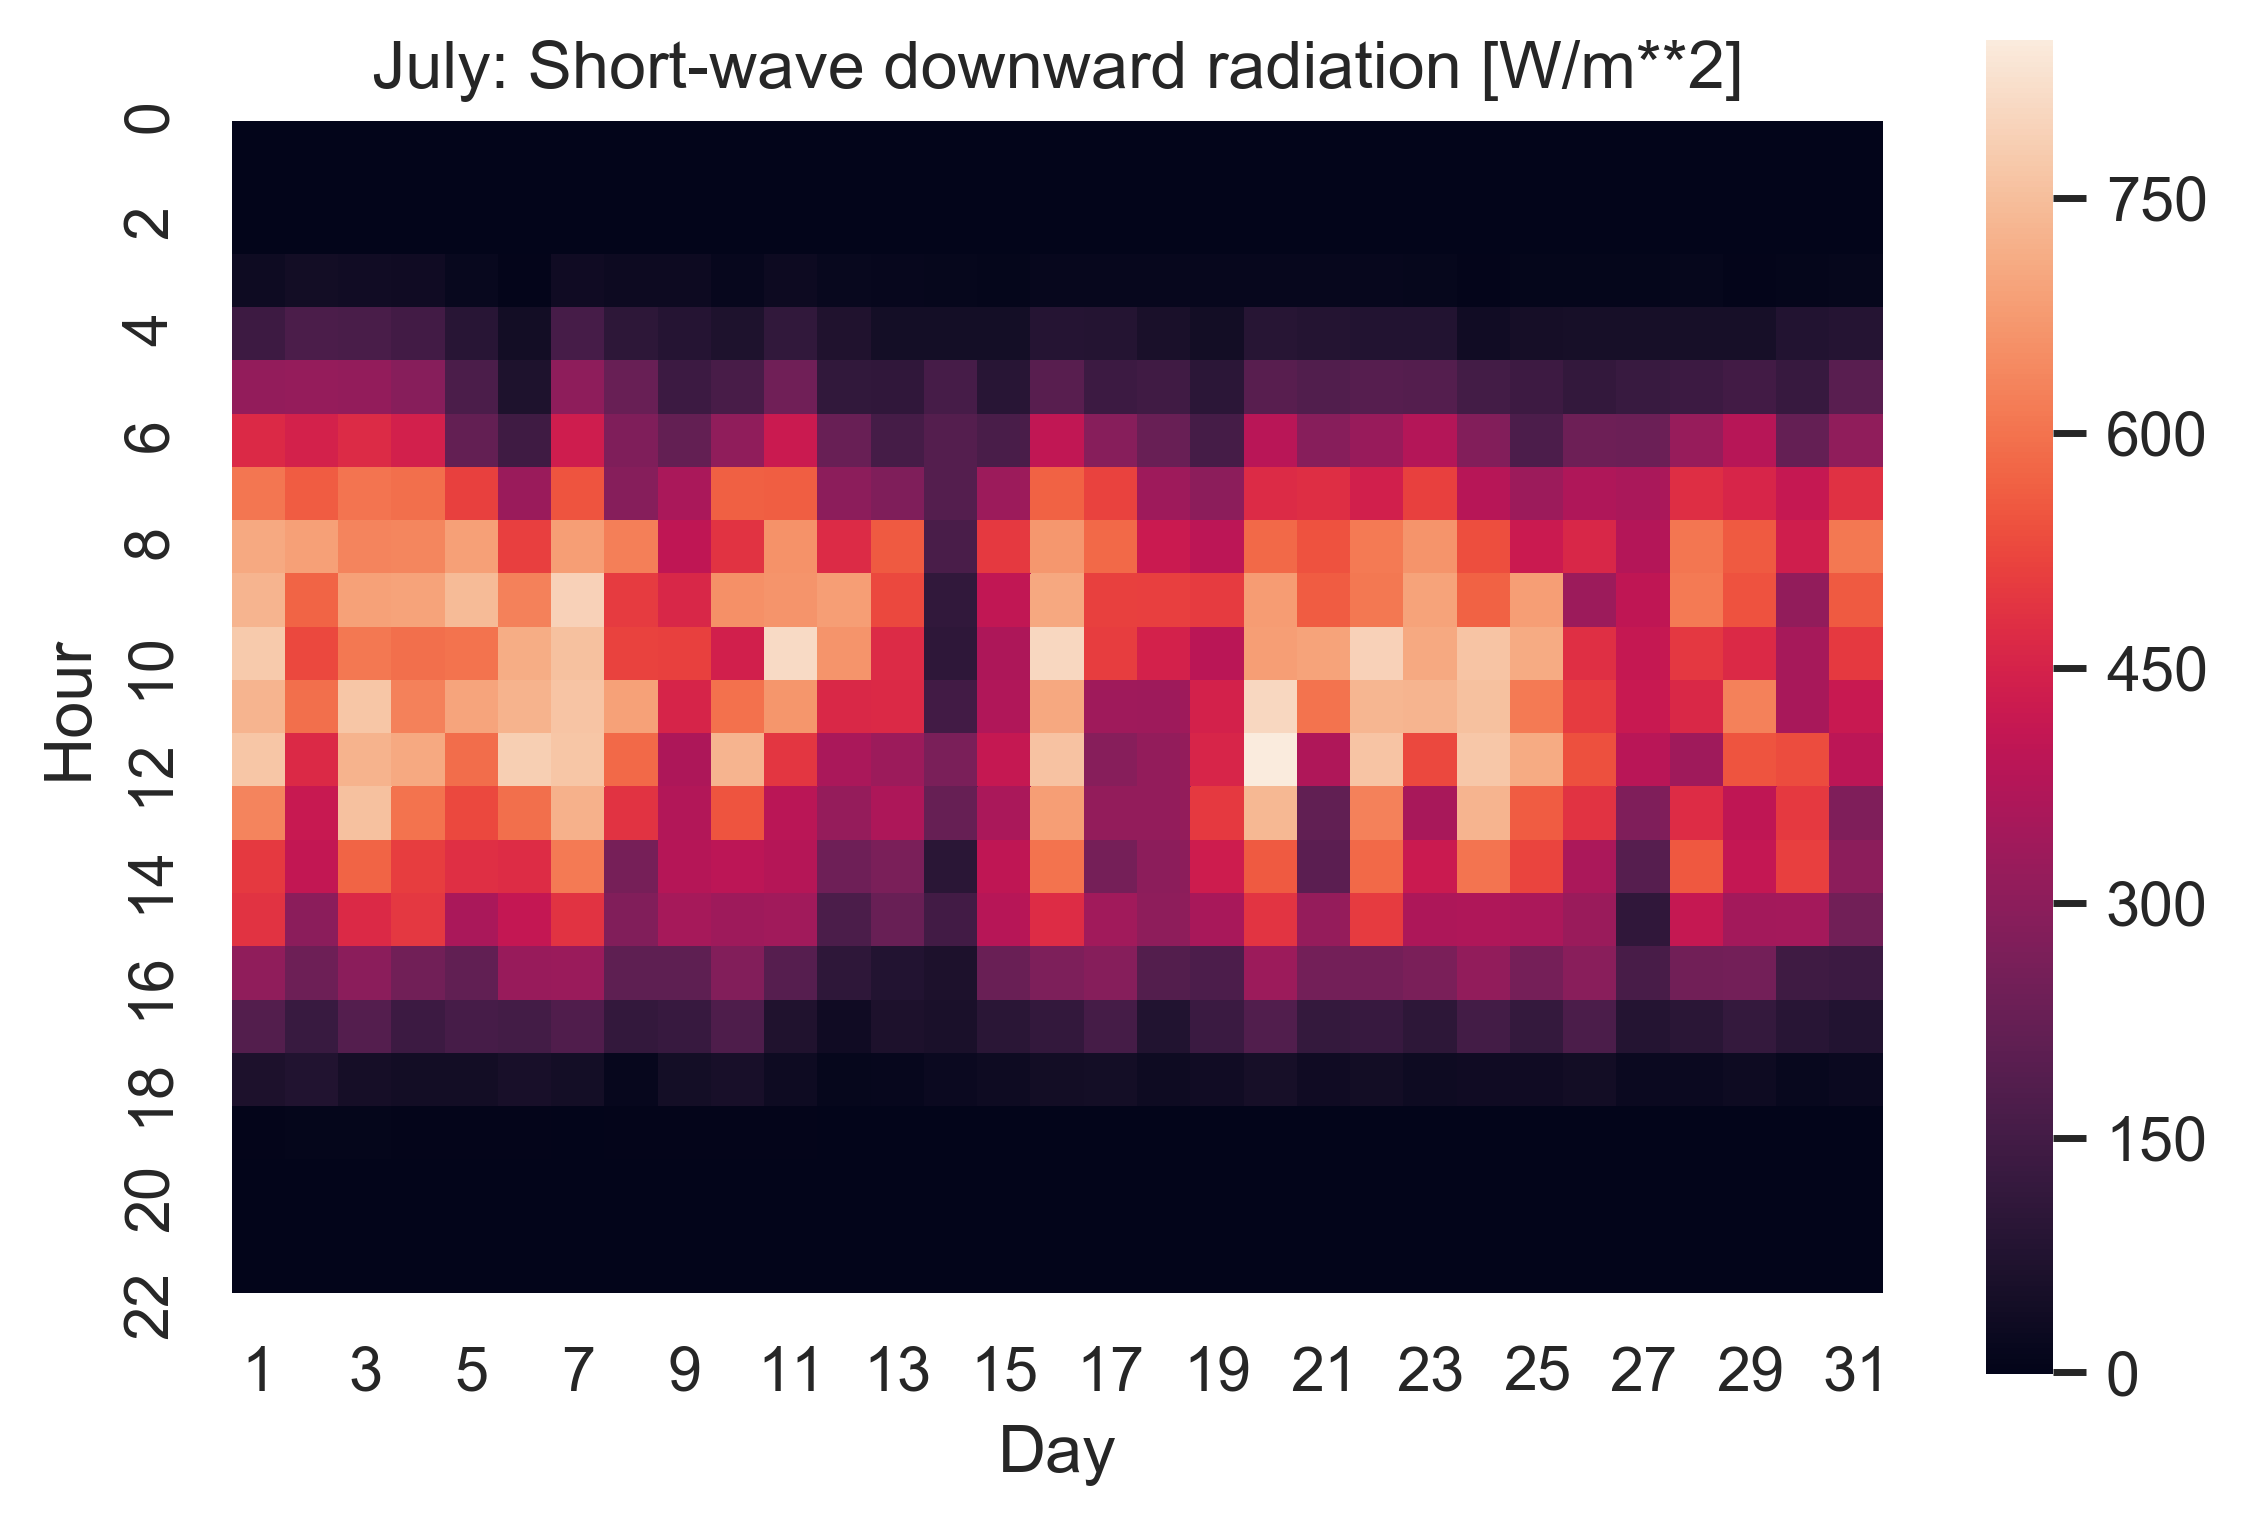

In [175]:
#July
piv = pd.pivot_table(basic_radiation[basic_radiation['Month']==7], values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Day"], fill_value=0)
plt.figure(dpi=400)
ax = sns.heatmap(piv, square=True)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('July: Short-wave downward radiation [W/m**2]')
plt.tight_layout()
plt.show()

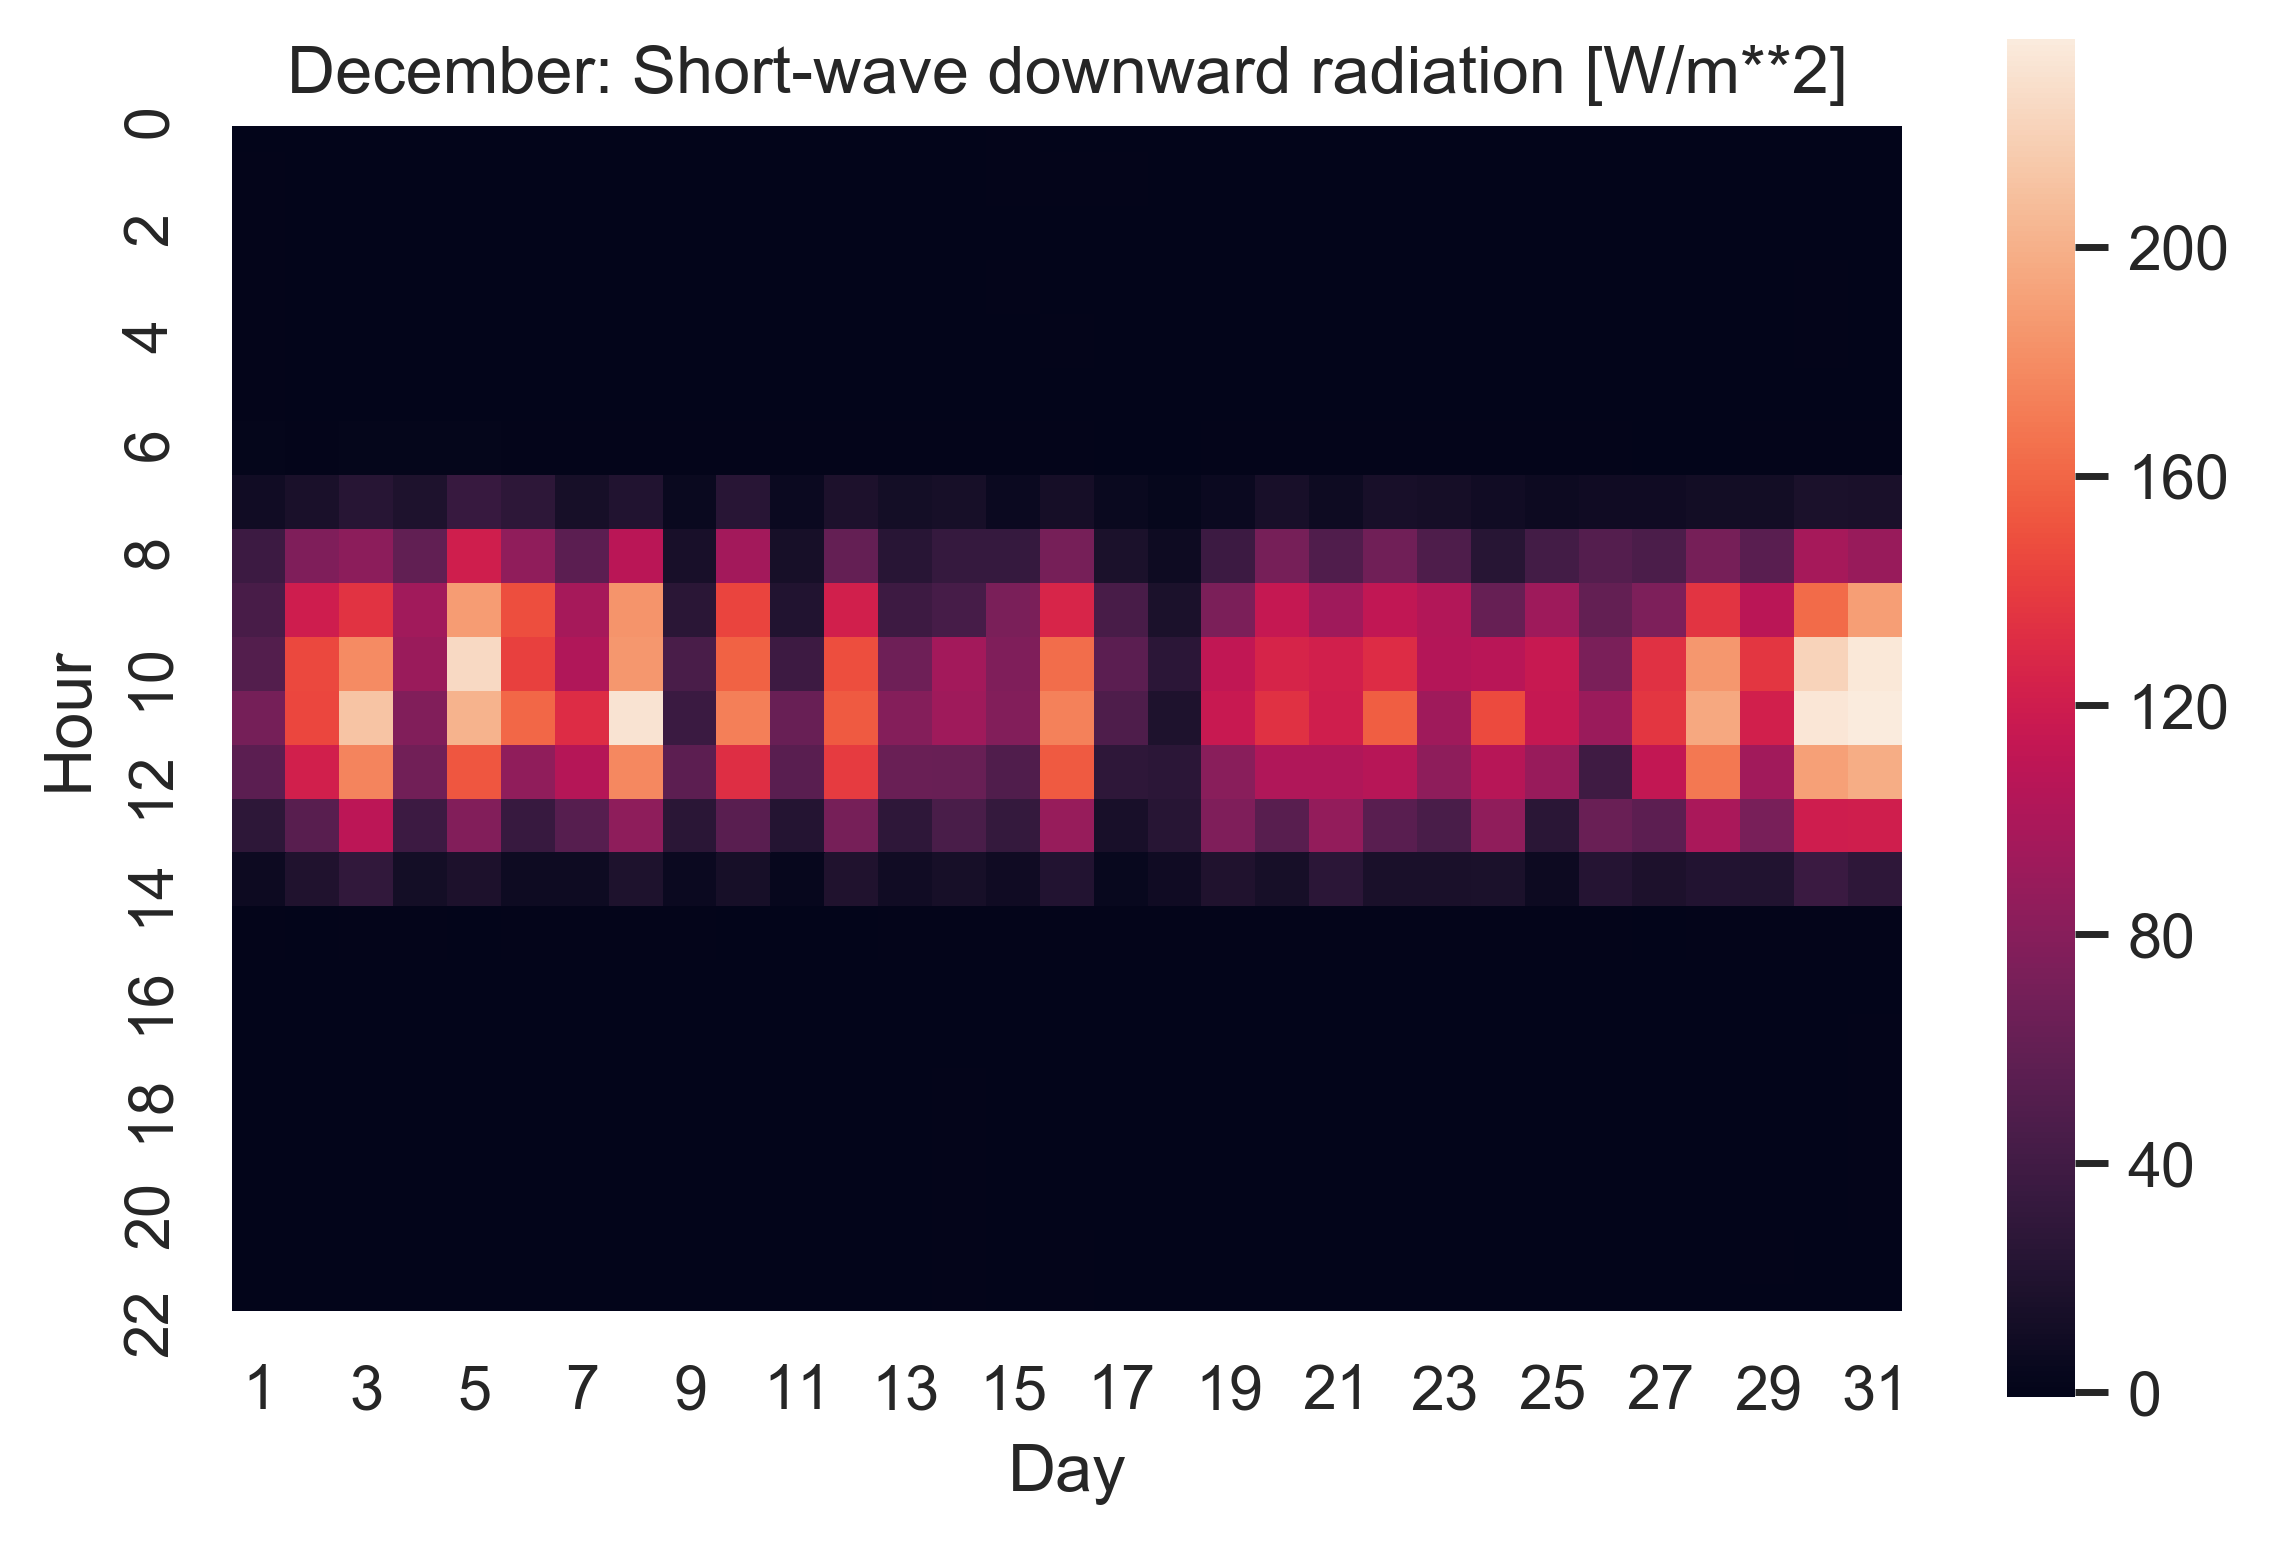

In [163]:

piv = pd.pivot_table(basic_radiation[basic_radiation['Month']==12], values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Day"], fill_value=0)
plt.figure(dpi=400)
ax = sns.heatmap(piv, square=True)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('December: Short-wave downward radiation [W/m**2]')
plt.tight_layout()
plt.show()

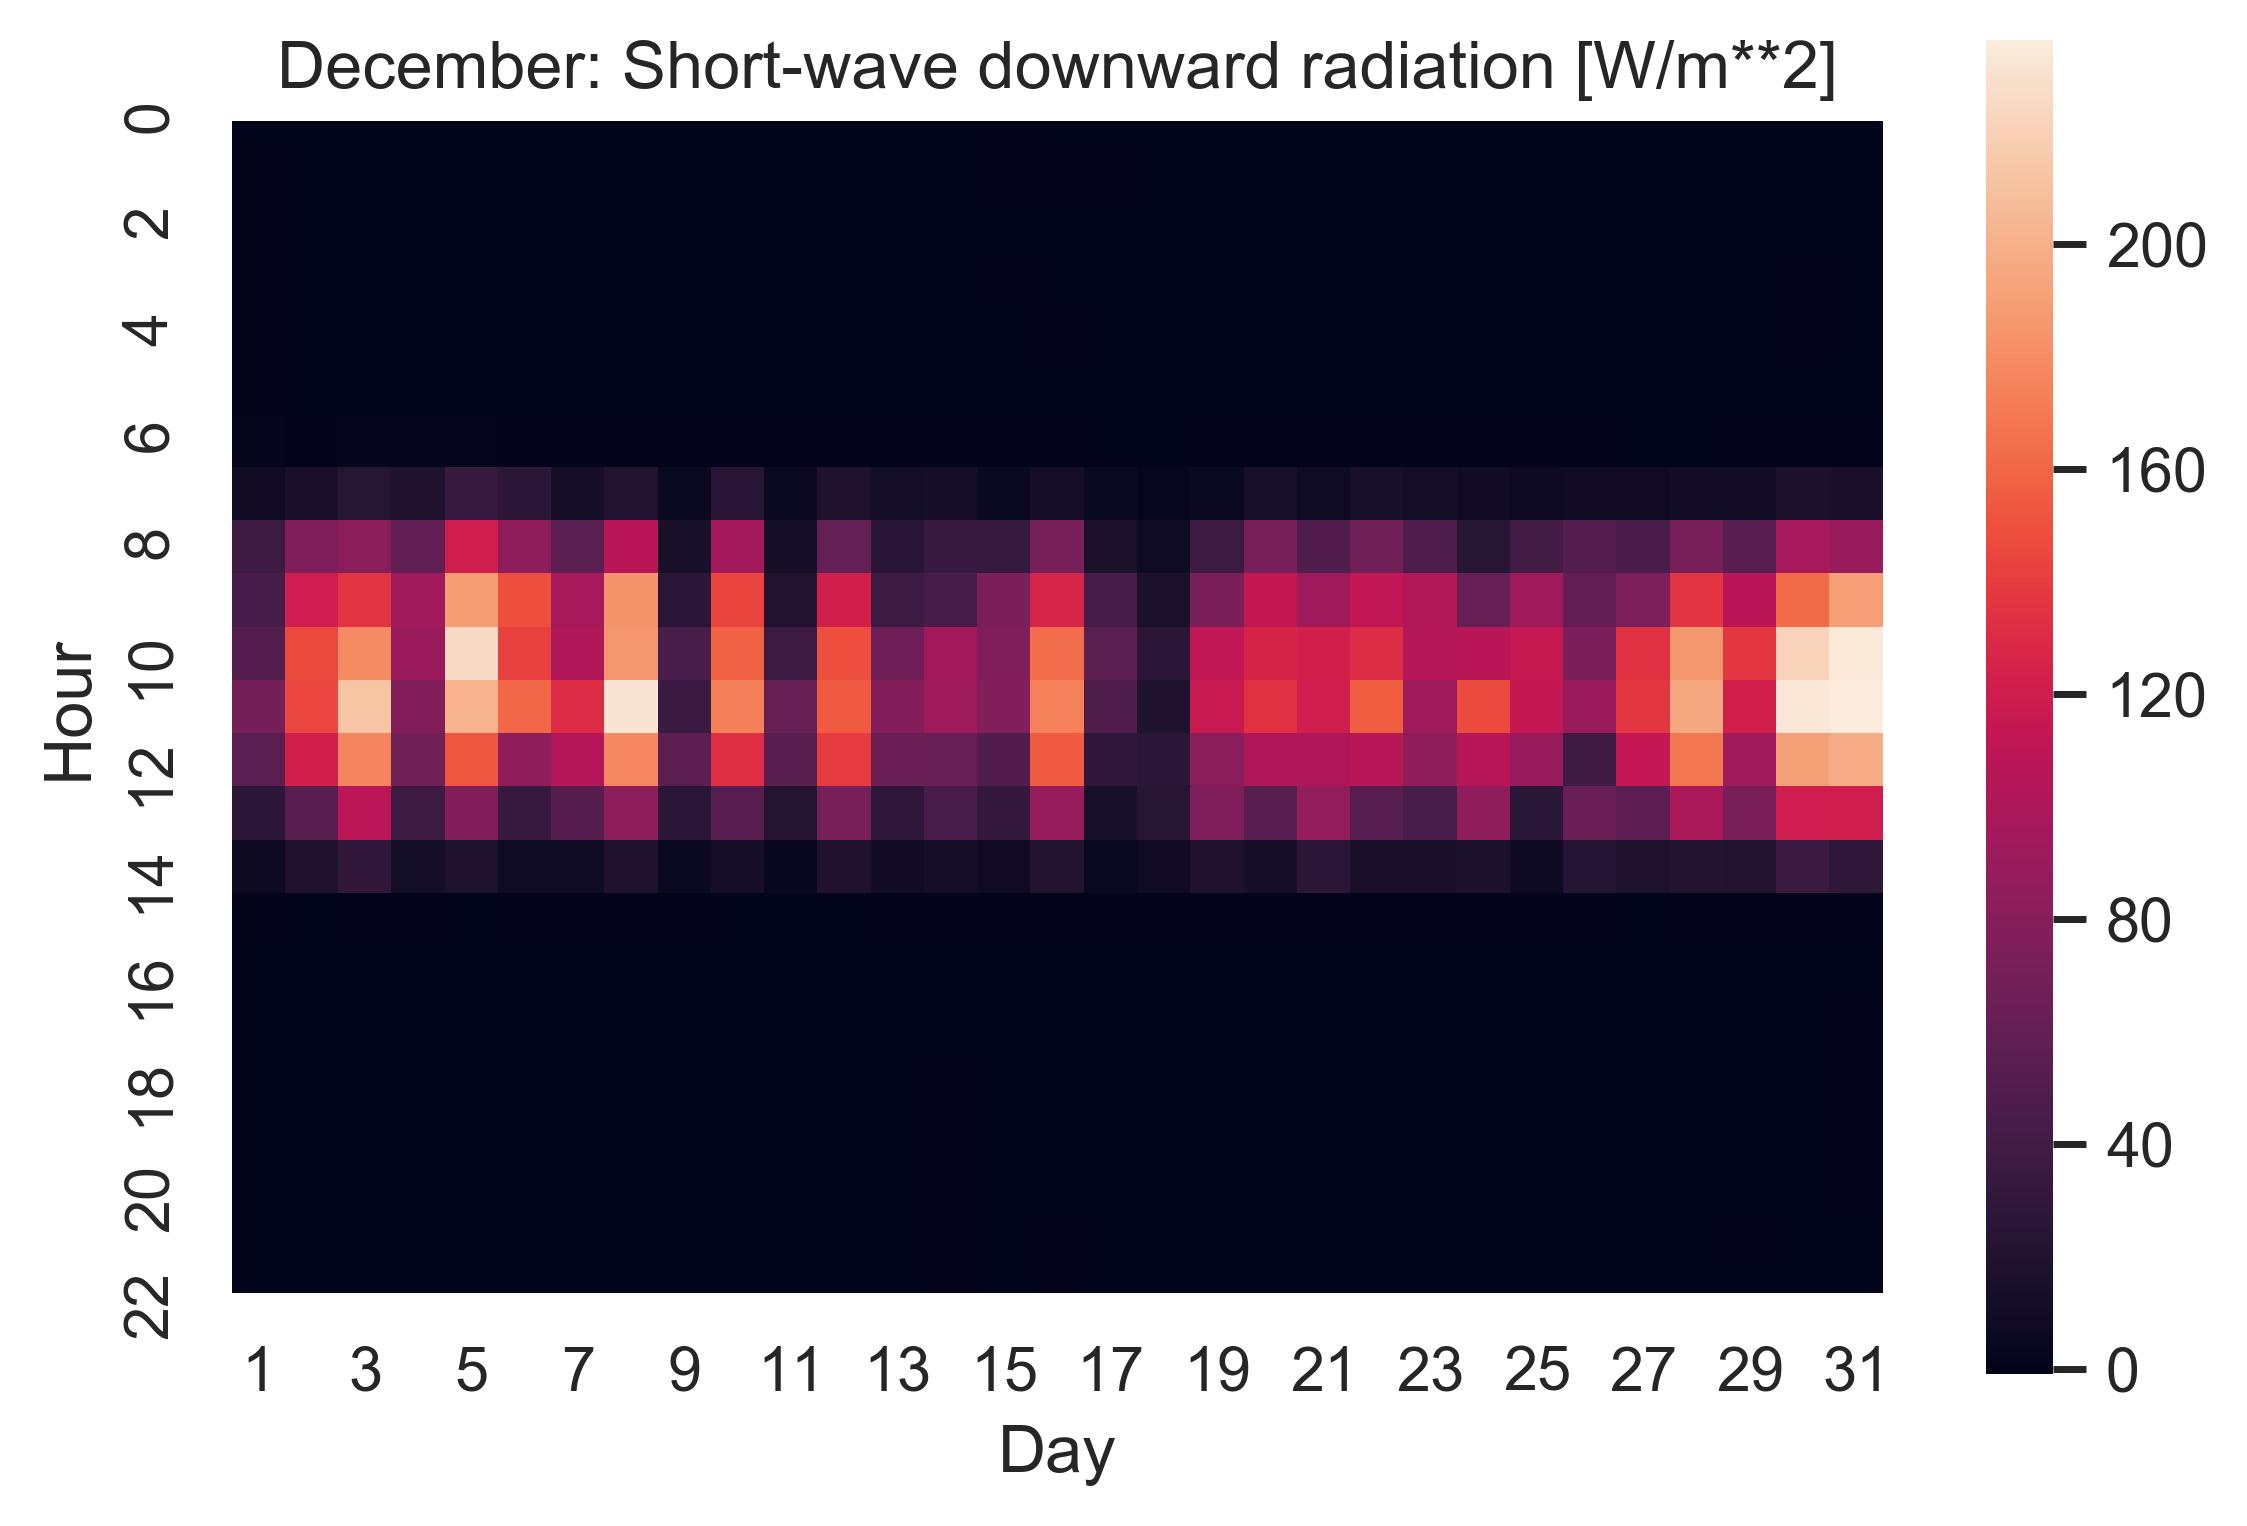

In [177]:

piv = pd.pivot_table(basic_radiation[basic_radiation['Month']==12], values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Day"], fill_value=0)
plt.figure(dpi=400)
ax = sns.heatmap(piv, square=True)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('December: Short-wave downward radiation [W/m**2]')
plt.tight_layout()
plt.show()

In [178]:
basic_radiation[(basic_radiation['Month']==1) & (basic_radiation['Year']==2015)]

Short-wave downward (GLOBAL) radiation [W/m**2]  \
Date/Time                                                              
2015-01-01 00:00:00                                              1.0   
2015-01-01 00:01:00                                              0.0   
2015-01-01 00:02:00                                              0.0   
2015-01-01 00:03:00                                              0.0   
2015-01-01 00:04:00                                              1.0   
...                                                              ...   
2015-01-31 23:55:00                                              0.0   
2015-01-31 23:56:00                                              0.0   
2015-01-31 23:57:00                                              0.0   
2015-01-31 23:58:00                                              0.0   
2015-01-31 23:59:00                                              0.0   

                     Direct radiation [W/m**2]  Diffuse radiation [W/m**2]  \
Date/Time                                                                    
2015-01-01 00:00:00                        0.0                         1.0   
2015-01-01 00:01:00                        0.0                         1.0   
2015-01-01 00:02:00                        0.0                         1.0   
2015-01-01 00:03:00                        0.0                         1.0   
2015-01-01 00:04:00                        0.0                         1.0   
...                                        ...                         ...   
2015-01-31 23:55:00                        0.0                         1.0   
2015-01-31 23:56:00                        0.0                         1.0   
2015-01-31 23:57:00                        0.0                         1.0   
2015-01-31 23:58:00                        0.0                         1.0   
2015-01-31 23:59:00                        0.0                         1.0   

                     Long-wave downward radiation [W/m**2]  \
Date/Time                                                    
2015-01-01 00:00:00                                  335.0   
2015-01-01 00:01:00                                  335.0   
2015-01-01 00:02:00                                  335.0   
2015-01-01 00:03:00                                  335.0   
2015-01-01 00:04:00                                  335.0   
...                                                    ...   
2015-01-31 23:55:00                                  294.0   
2015-01-31 23:56:00                                  297.0   
2015-01-31 23:57:00                                  299.0   
2015-01-31 23:58:00                                  299.0   
2015-01-31 23:59:00                                  299.0   

                     Air temperature [deg C]  Humidity, relative [%]  \
Date/Time                                                              
2015-01-01 00:00:00                      3.9                    99.0   
2015-01-01 00:01:00                      3.9                    99.0   
2015-01-01 00:02:00                      3.9                    99.0   
2015-01-01 00:03:00                      4.0                    99.0   
2015-01-01 00:04:00                      3.9                    99.0   
...                                      ...                     ...   
2015-01-31 23:55:00                     -0.6                    98.0   
2015-01-31 23:56:00                     -0.6                    98.0   
2015-01-31 23:57:00                     -0.6                    98.0   
2015-01-31 23:58:00                     -0.6                    98.0   
2015-01-31 23:59:00                     -0.6                    98.0   

                     Station pressure [hPa]  Hour  Month  Day  Year  
Date/Time                                                            
2015-01-01 00:00:00                  1013.0     0      1    1  2015  
2015-01-01 00:01:00                  1013.0     0      1    1  2015  
2015-01-01 00:02:00                  1013.0  

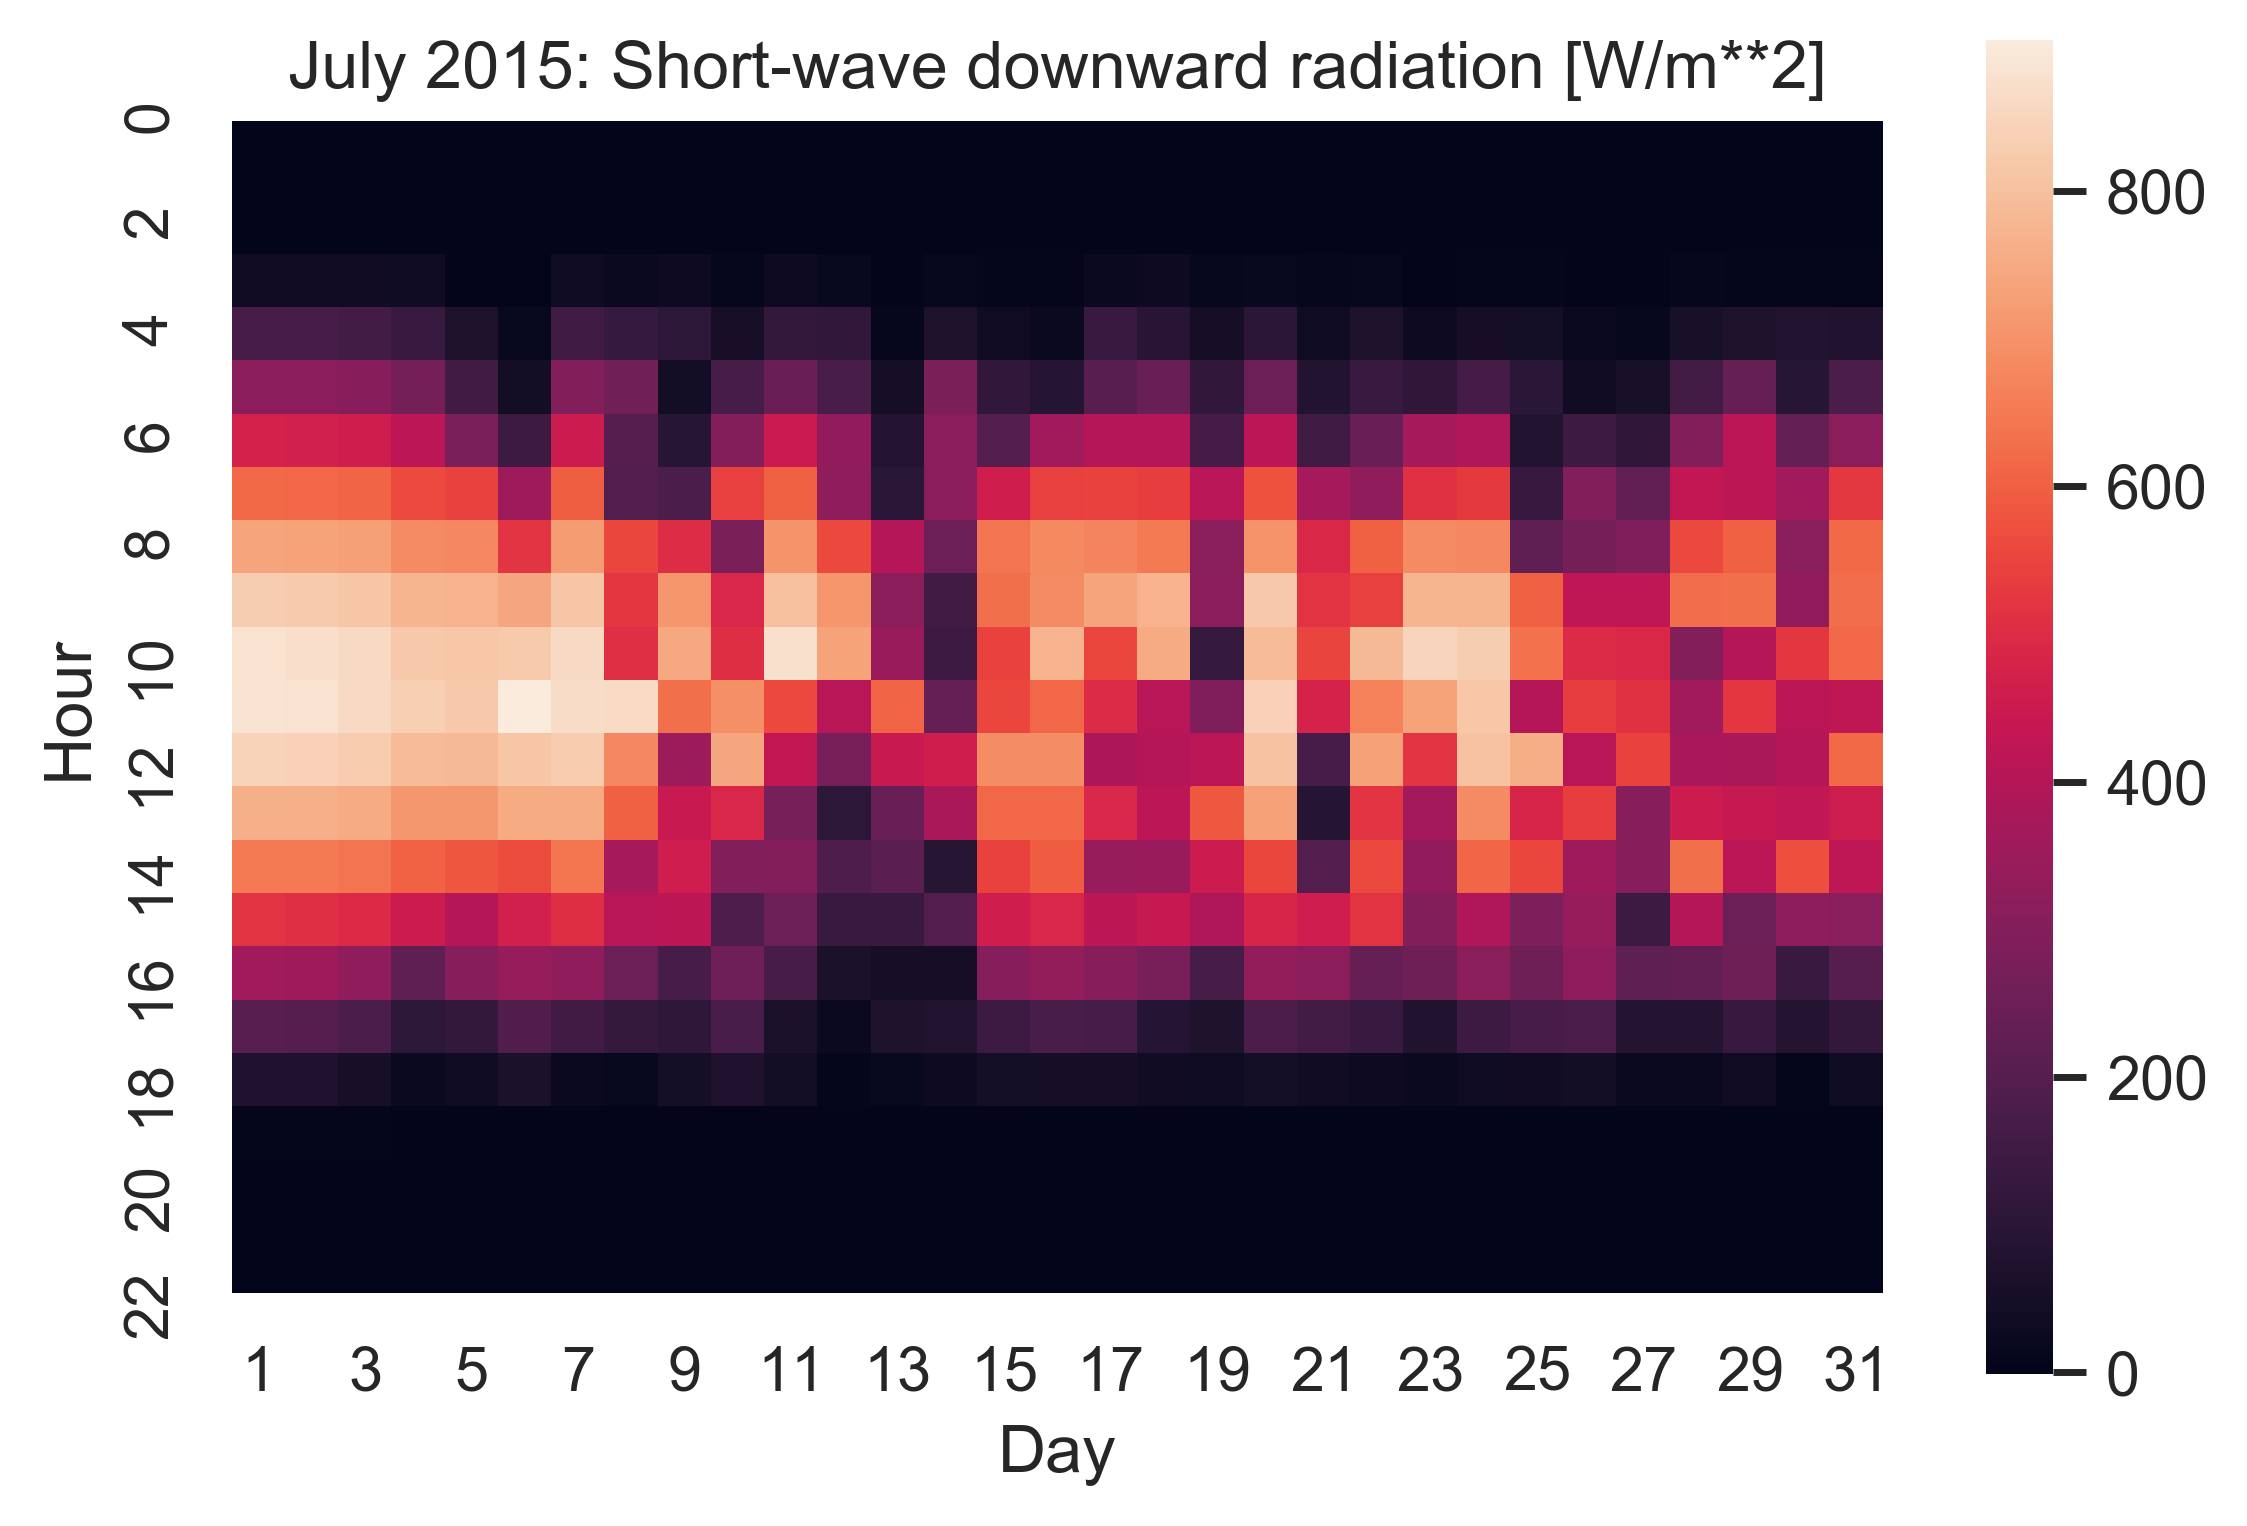

In [179]:
# July
piv = pd.pivot_table(basic_radiation[(basic_radiation['Month'] == 7) & (basic_radiation['Year'] == 2015)], values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Day"], fill_value=0)
plt.figure(dpi=400)
ax = sns.heatmap(piv, square=True)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('July 2015: Short-wave downward radiation [W/m**2]')
plt.tight_layout()
plt.show()

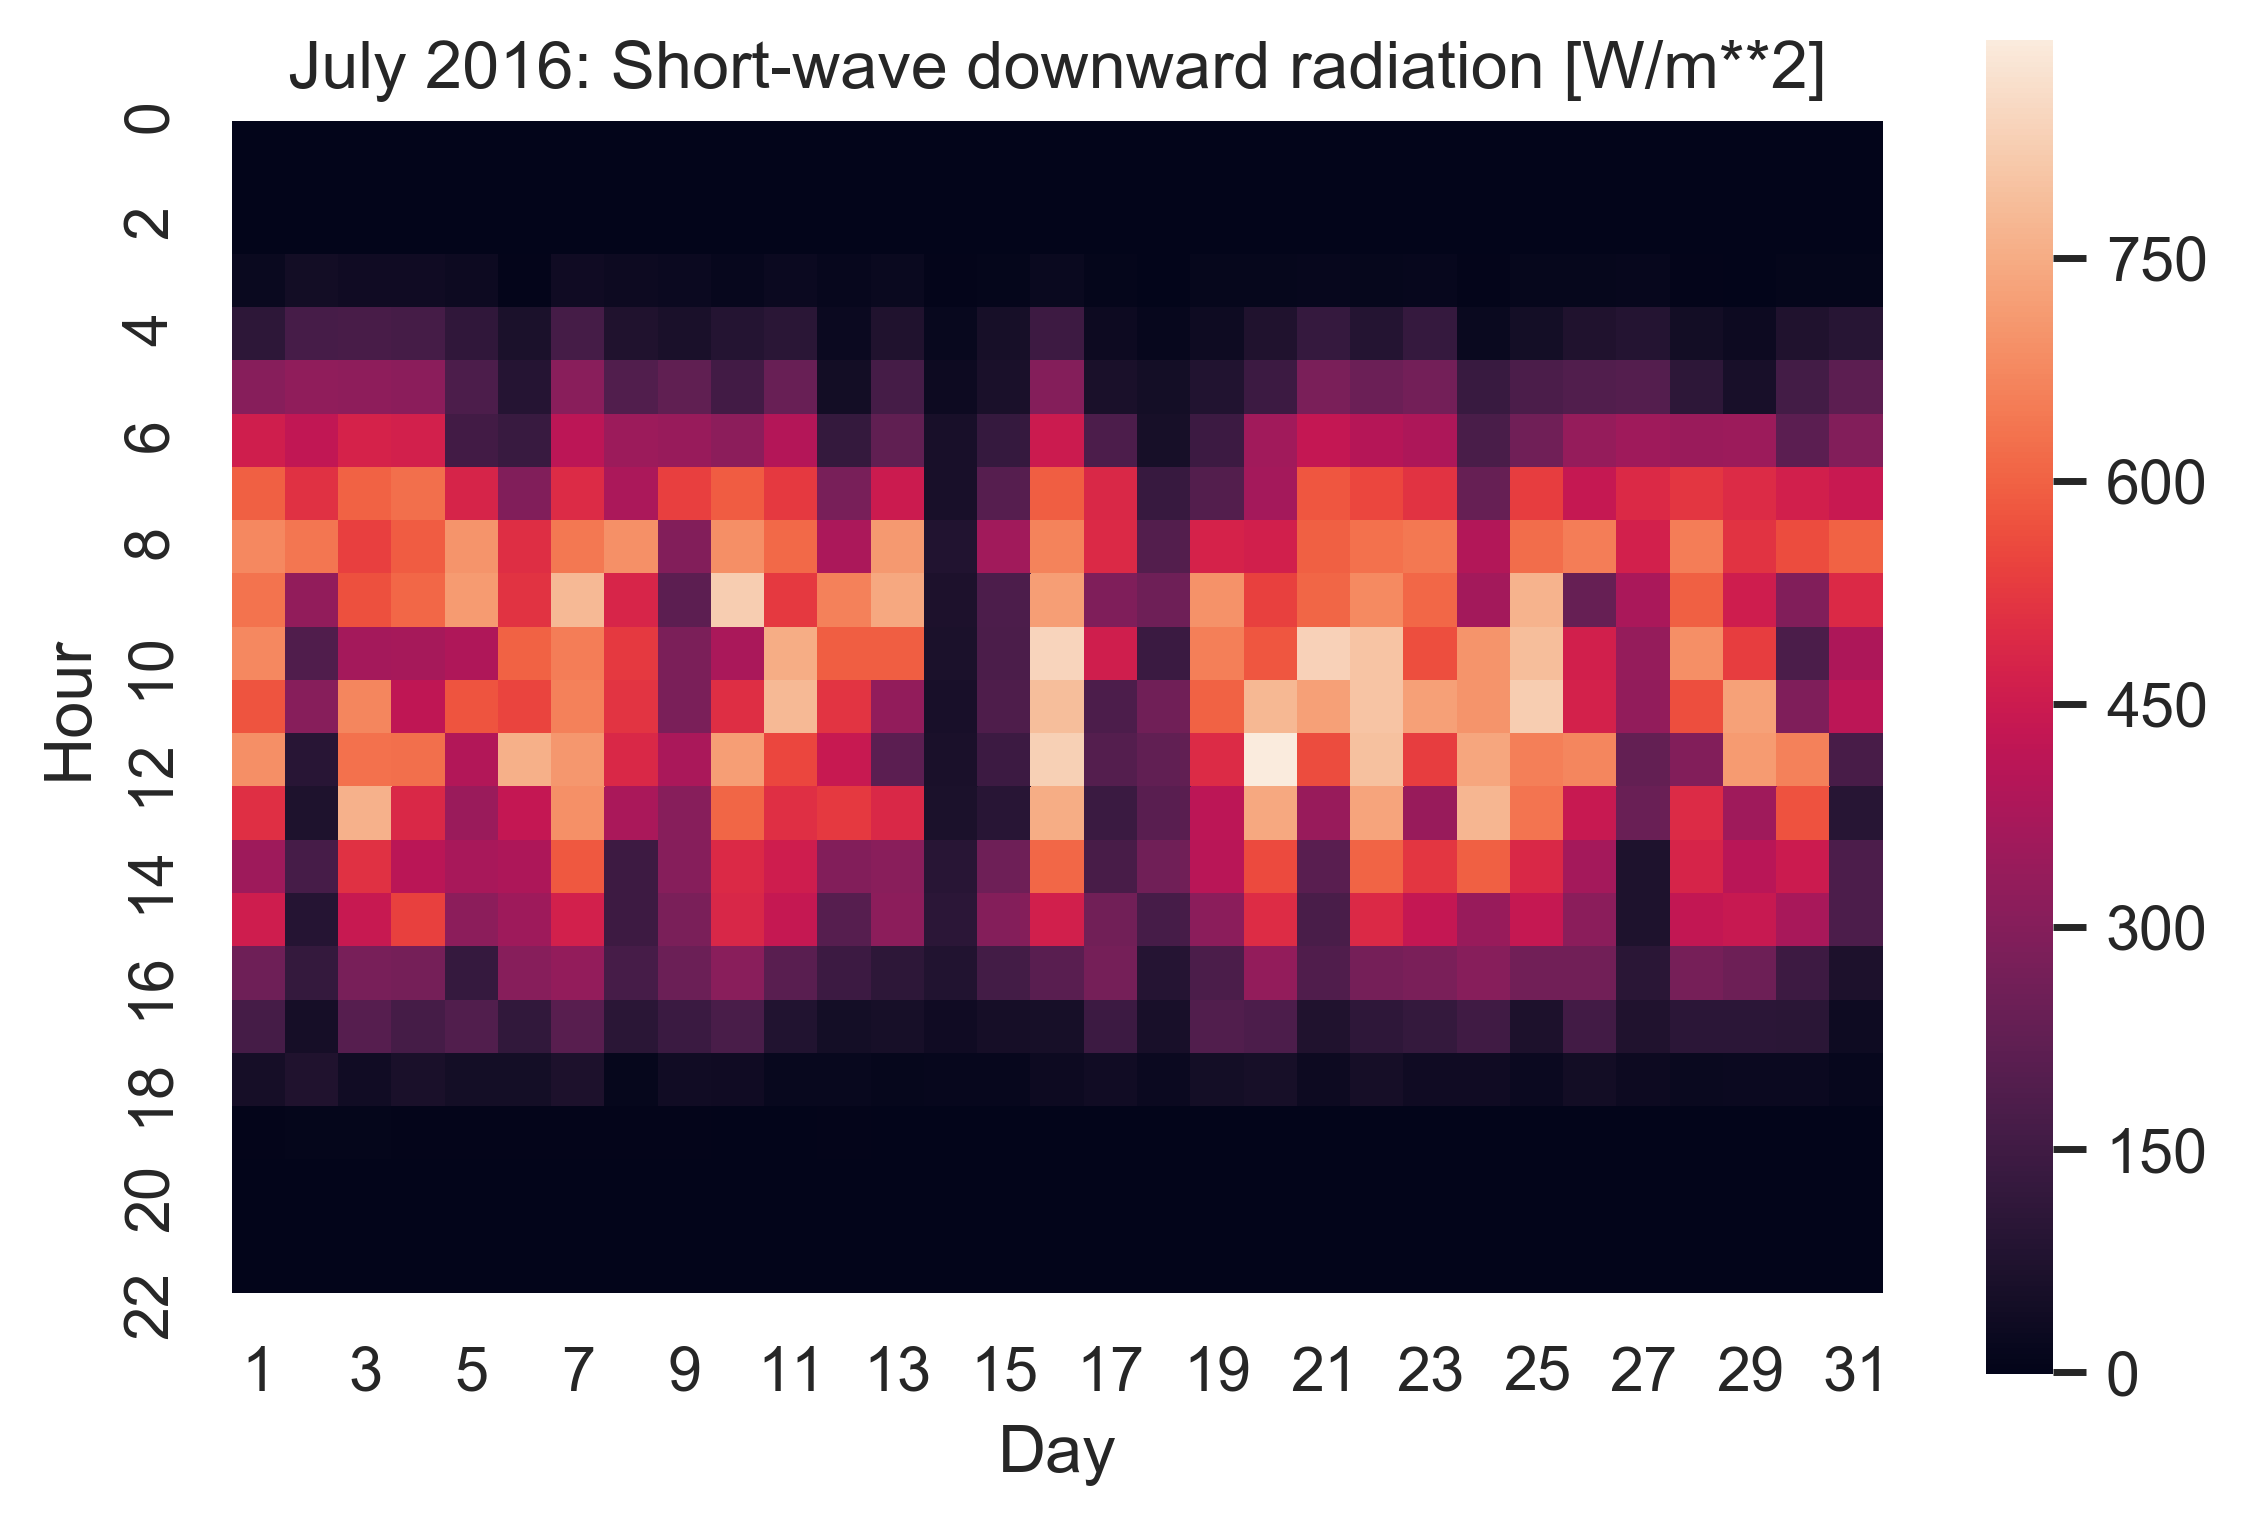

In [180]:
# July
piv = pd.pivot_table(basic_radiation[(basic_radiation['Month'] == 7) & (basic_radiation['Year'] == 2016)], values="Short-wave downward (GLOBAL) radiation [W/m**2]", index=[
                     "Hour"], columns=["Day"], fill_value=0)
plt.figure(dpi=400)
ax = sns.heatmap(piv, square=True)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('July 2016: Short-wave downward radiation [W/m**2]')
plt.tight_layout()
plt.show()

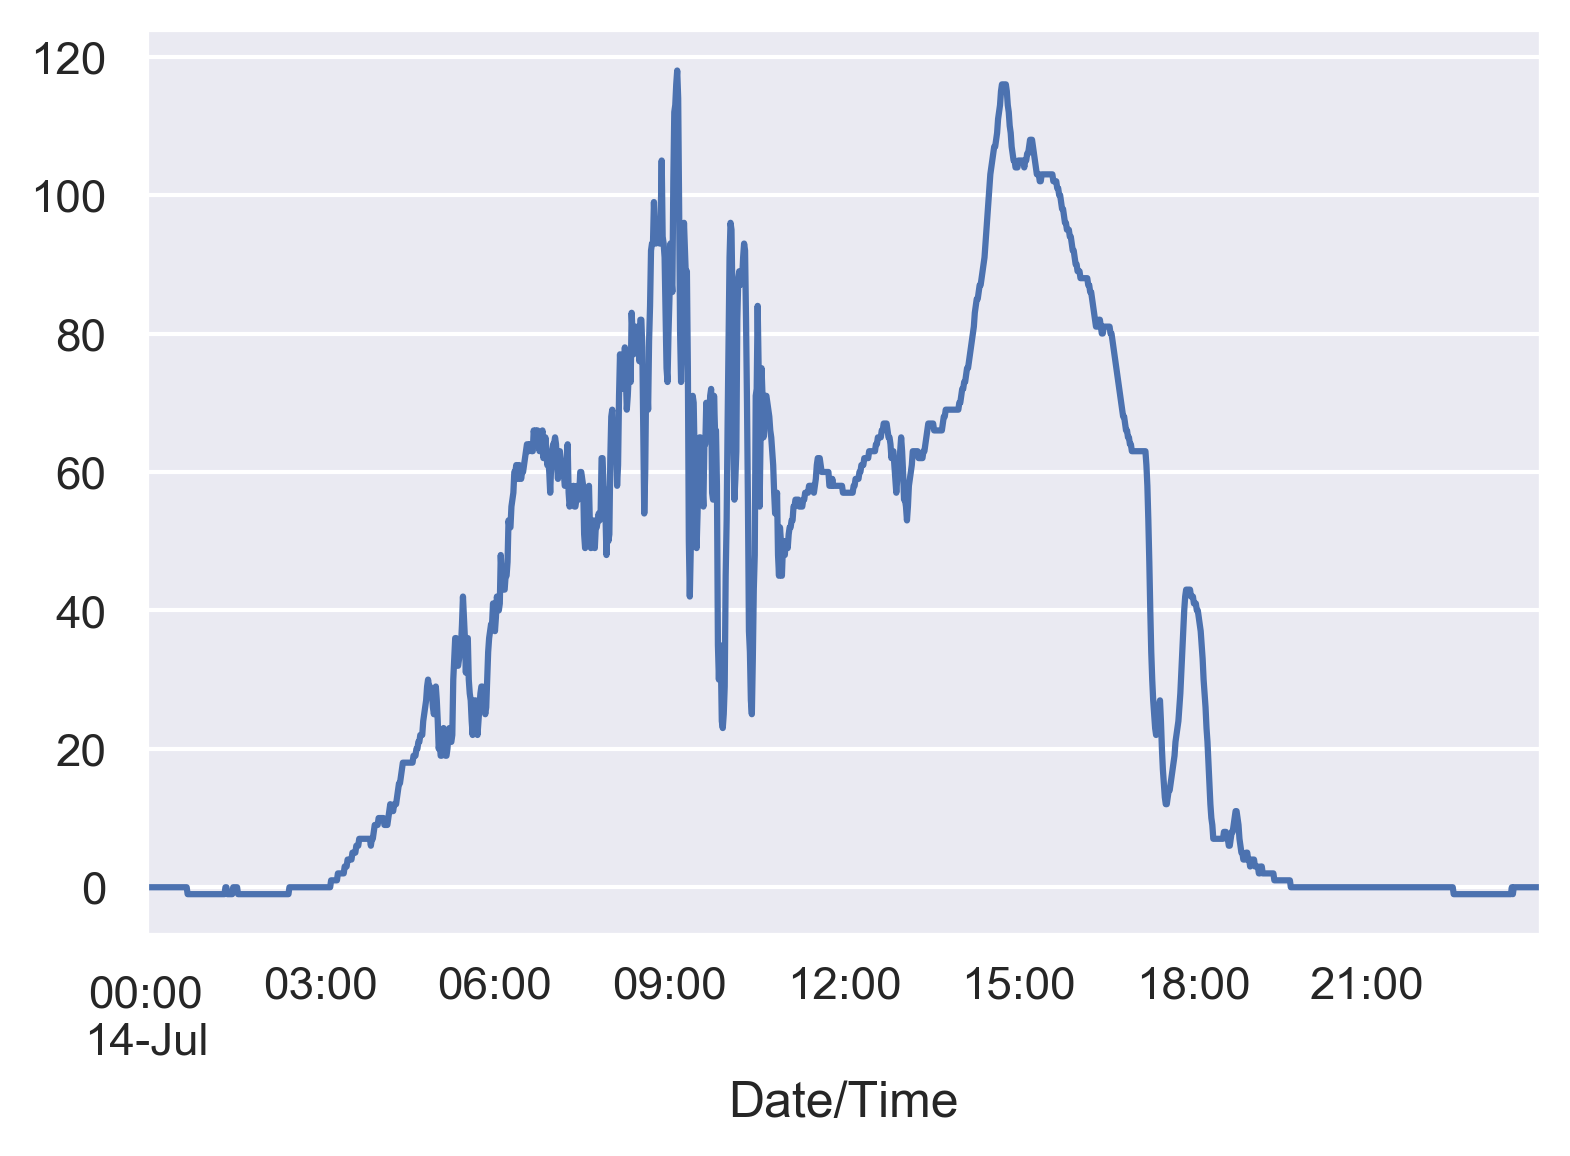

In [181]:
plt.figure(dpi=300)
basic_radiation[(basic_radiation['Month'] == 7) & (
    basic_radiation['Year'] == 2016) & (basic_radiation['Day'] == 14)].iloc[:, 0].plot()

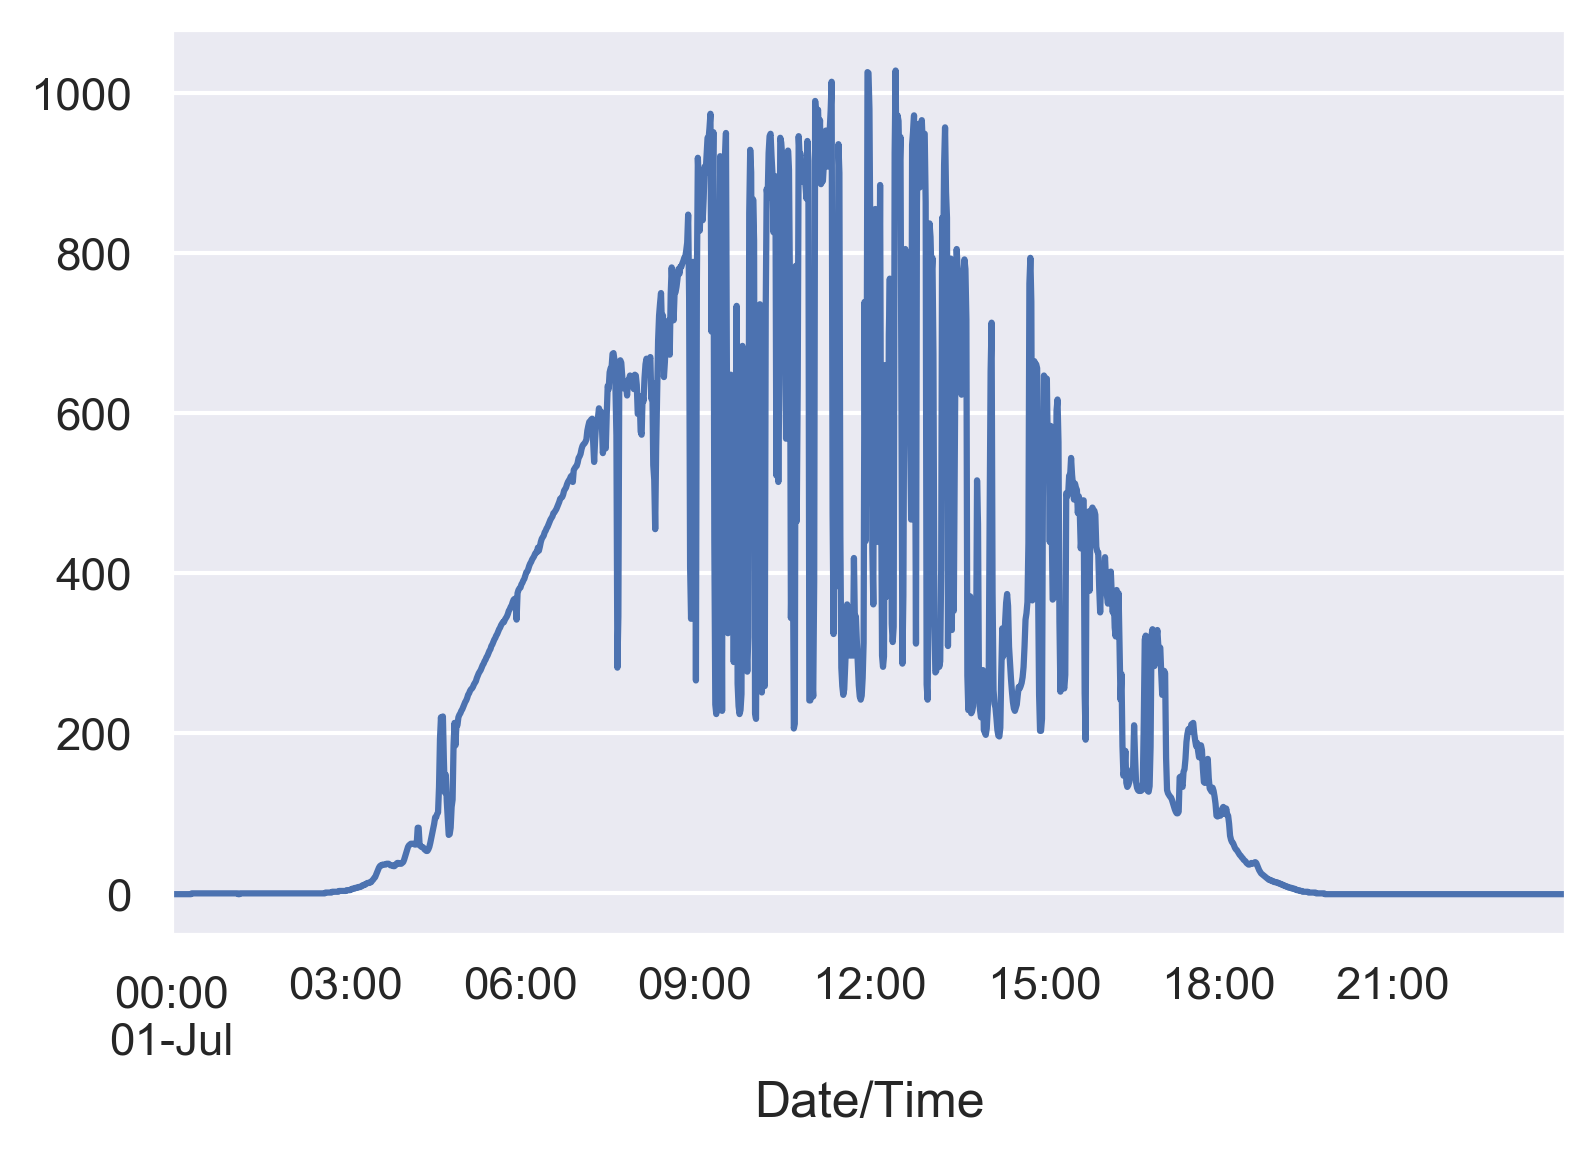

In [182]:
plt.figure(dpi=300)
basic_radiation[(basic_radiation['Month'] == 7) & (
    basic_radiation['Year'] == 2016) & (basic_radiation['Day'] == 1)].iloc[:, 0].plot()

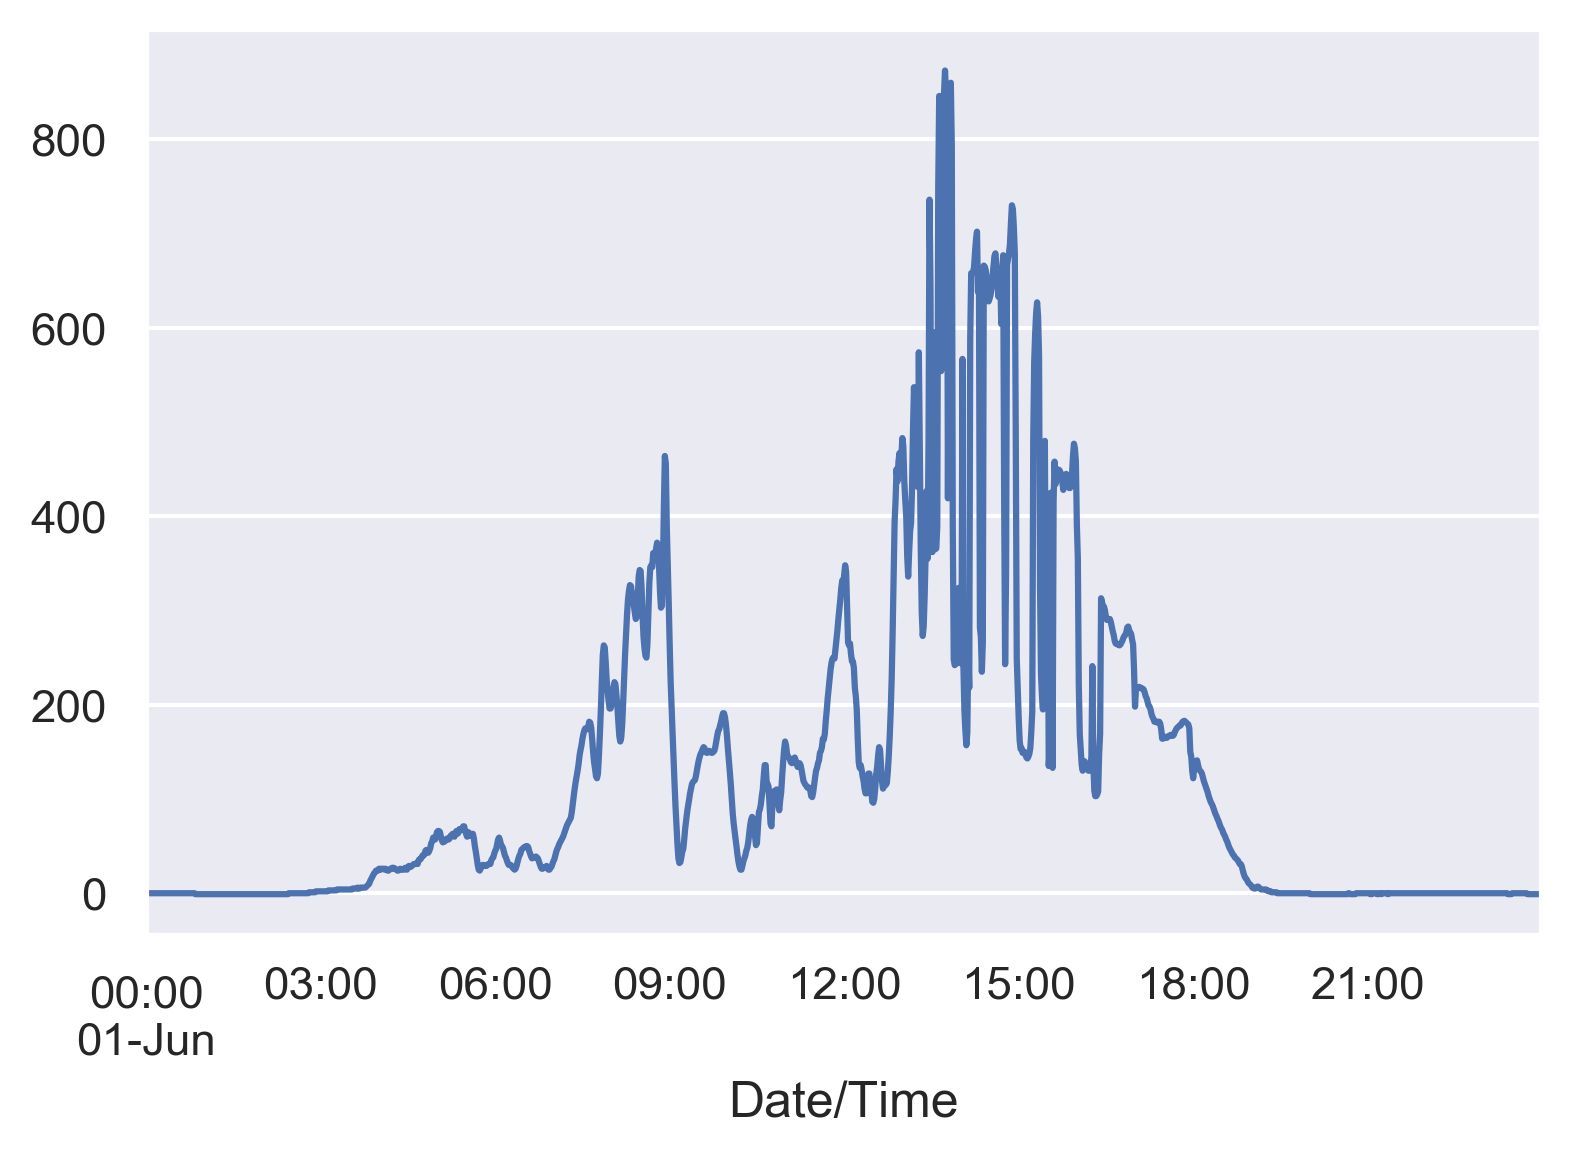

In [183]:
plt.figure(dpi=300)
basic_radiation[(basic_radiation['Month'] == 6) & (
    basic_radiation['Year'] == 2016) & (basic_radiation['Day'] == 1)].iloc[:, 0].plot()

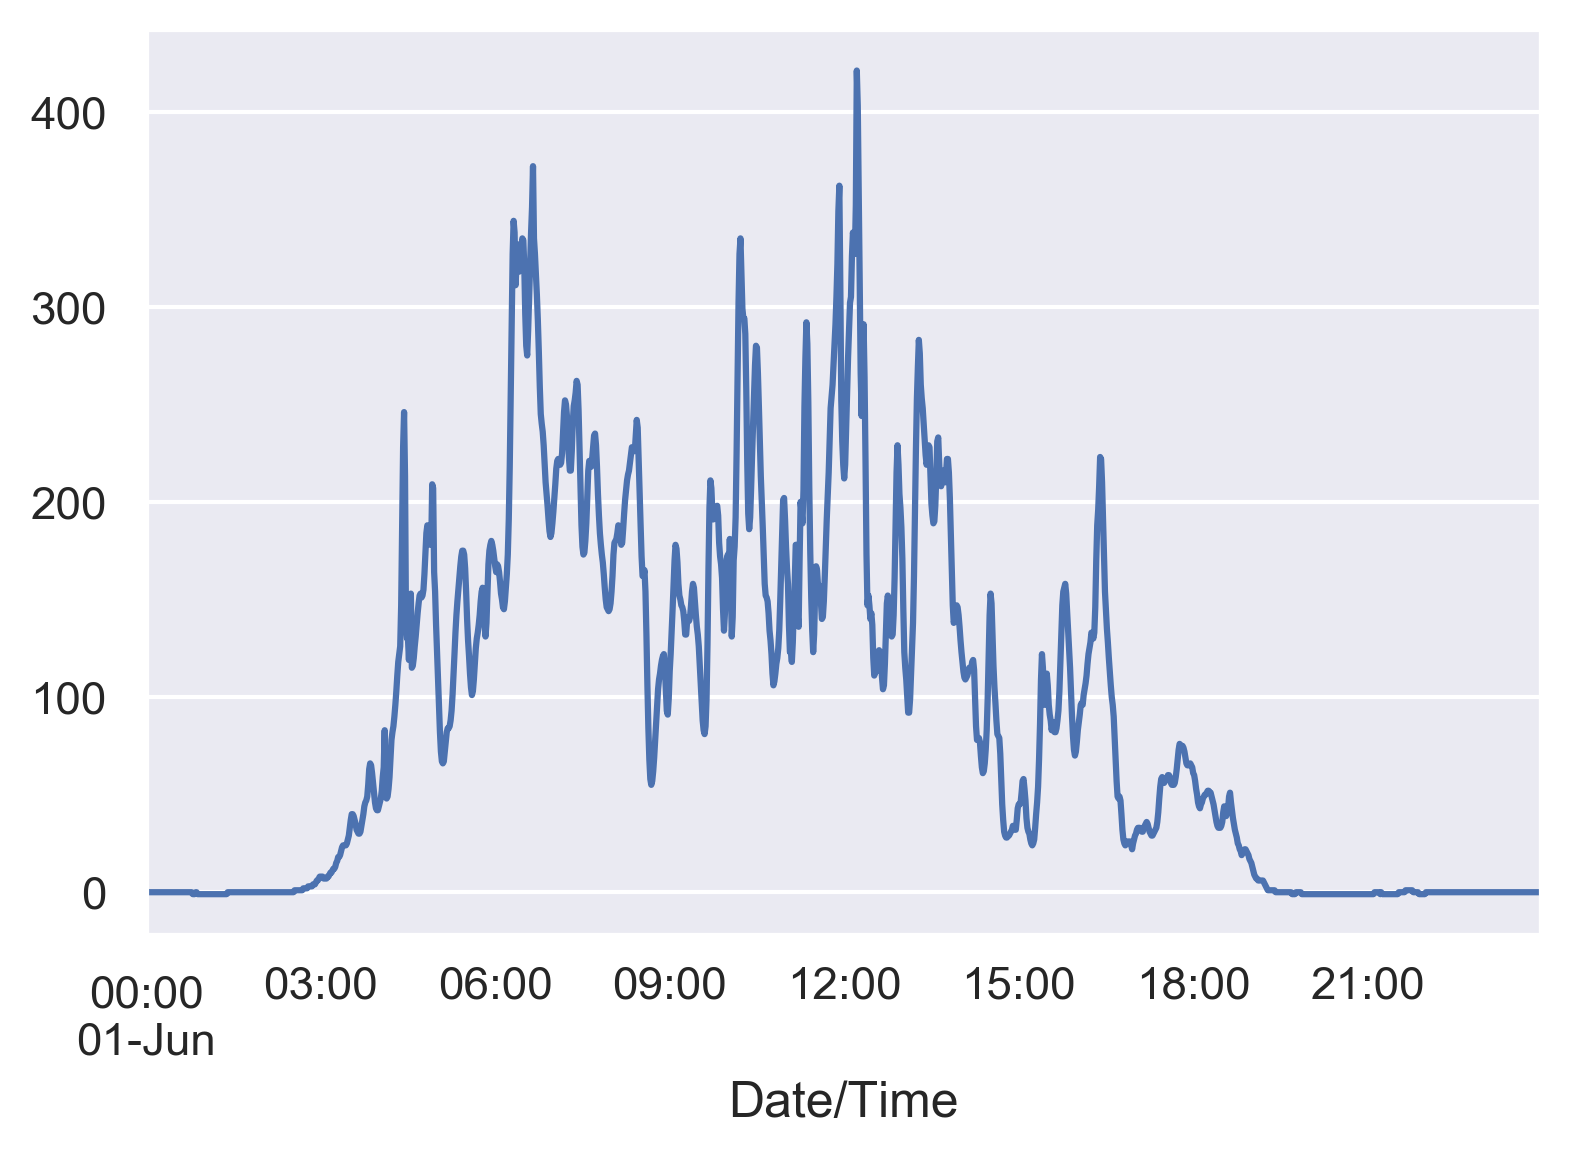

In [184]:
plt.figure(dpi=300)
basic_radiation[(basic_radiation['Month'] == 6) & (
    basic_radiation['Year'] == 2015) & (basic_radiation['Day'] == 1)].iloc[:, 0].plot()

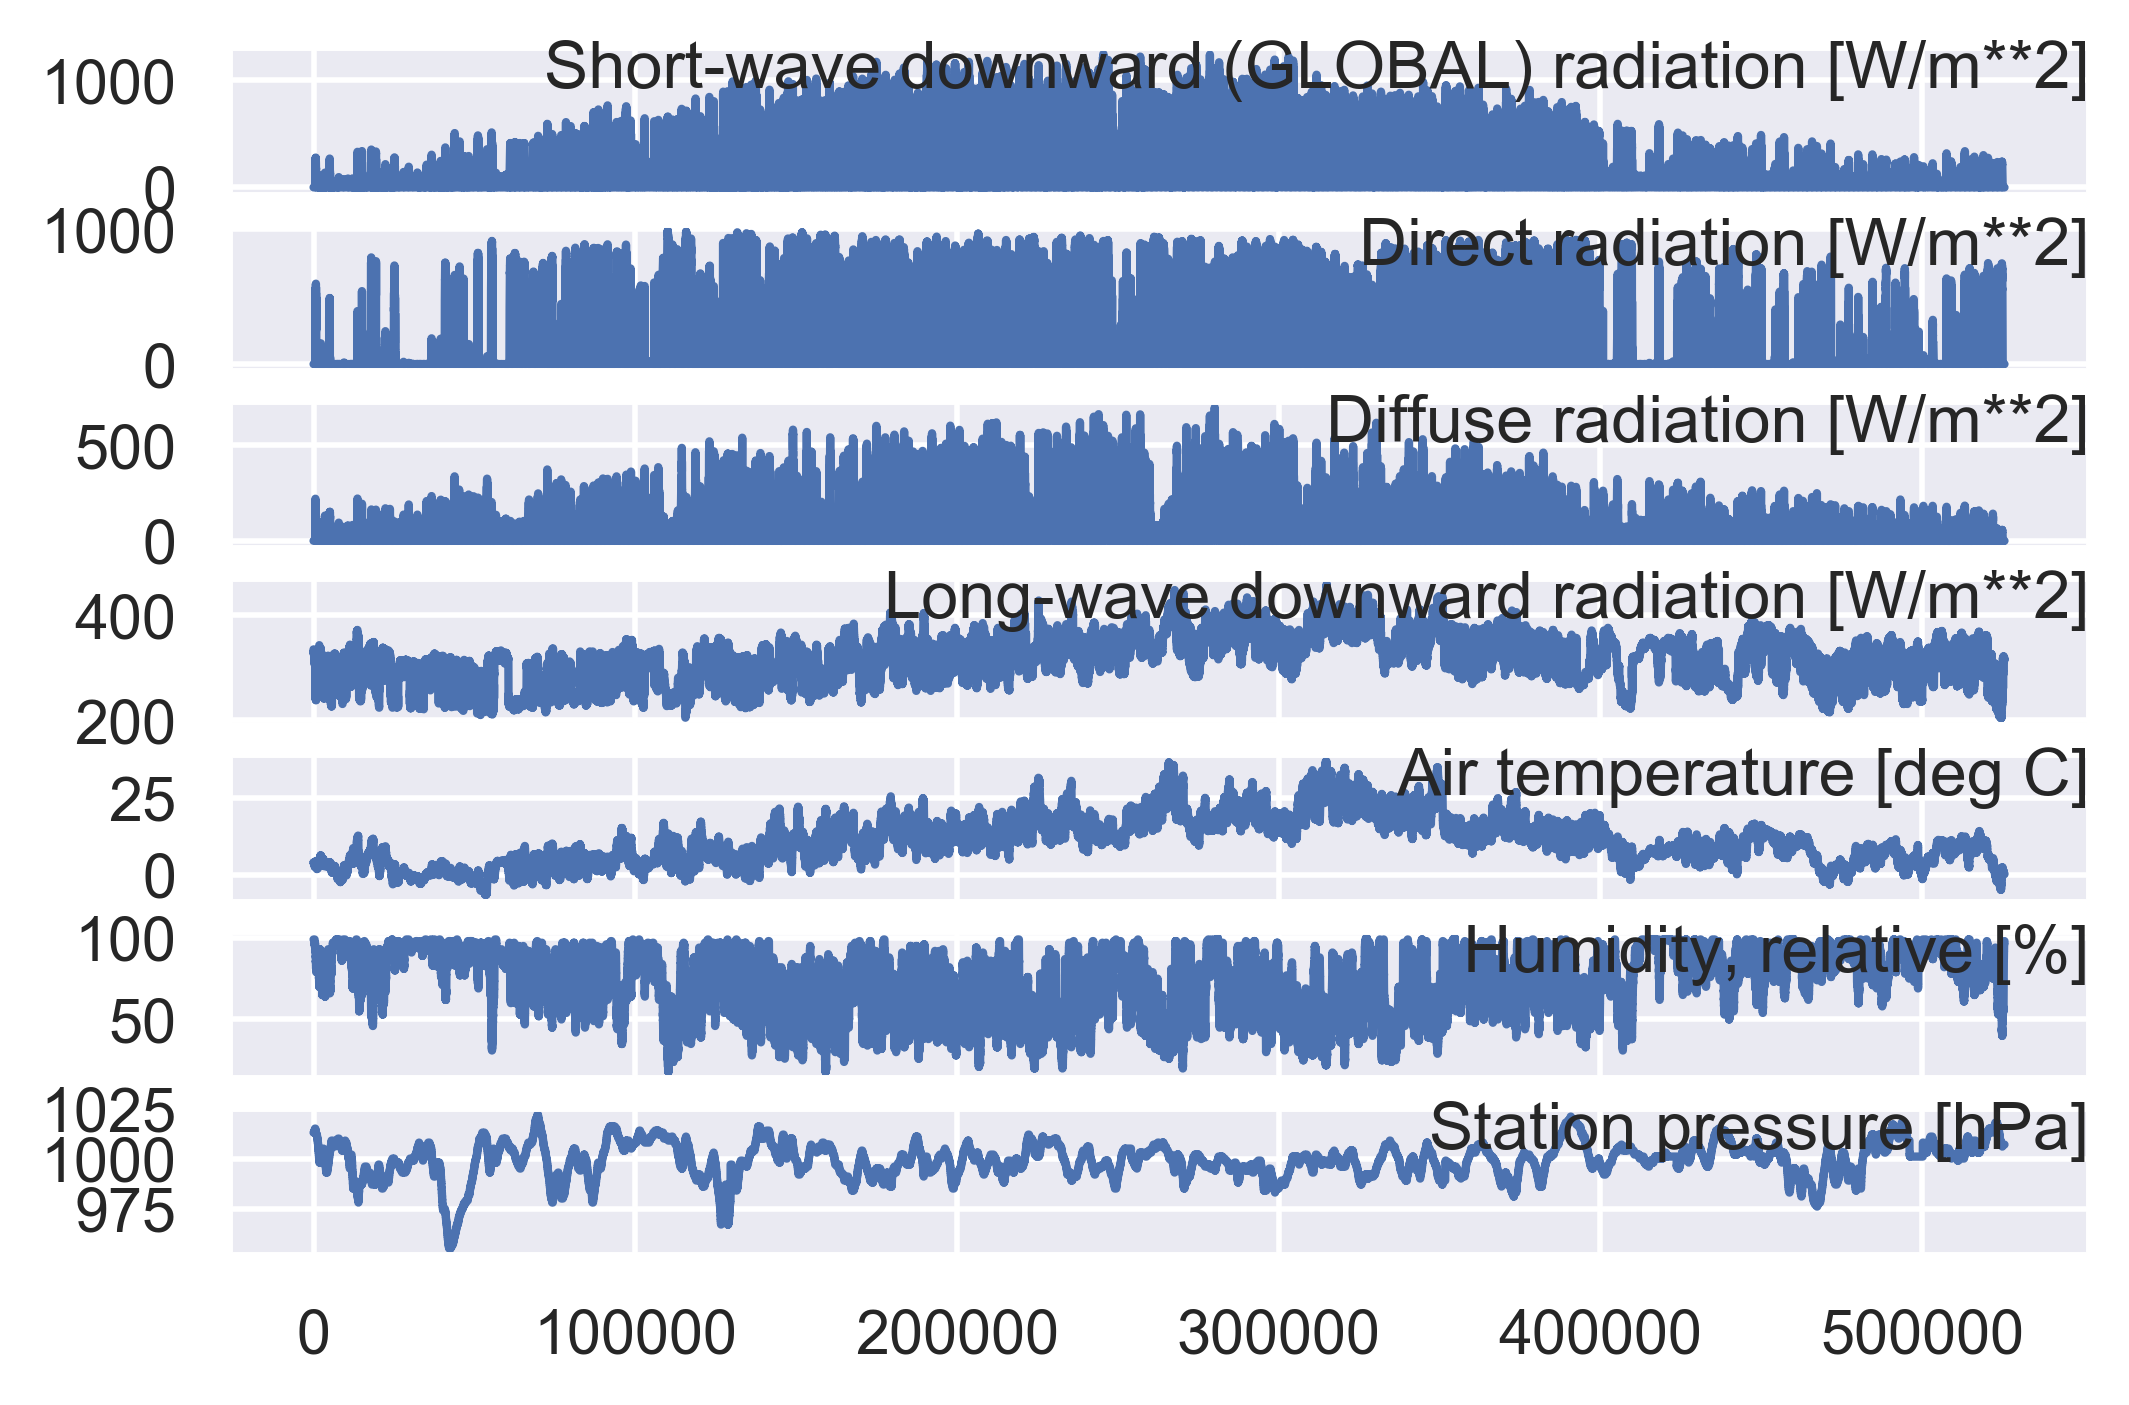

In [210]:
#from pandas import read_csv
from matplotlib import pyplot
# load dataset
#dataset = read_csv('RNNtry.csv', header=0, index_col=0)
dataset = copy.deepcopy(basic_radiation.query("`Year`==2015"))
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5,6]
i = 1
# plot each column
pyplot.figure(dpi=400)
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [209]:
basic_radiation

Short-wave downward (GLOBAL) radiation [W/m**2]  \
Date/Time                                                              
2015-01-01 00:00:00                                              1.0   
2015-01-01 00:01:00                                              0.0   
2015-01-01 00:02:00                                              0.0   
2015-01-01 00:03:00                                              0.0   
2015-01-01 00:04:00                                              1.0   
...                                                              ...   
2016-12-31 23:55:00                                              0.0   
2016-12-31 23:56:00                                              0.0   
2016-12-31 23:57:00                                              0.0   
2016-12-31 23:58:00                                              0.0   
2016-12-31 23:59:00                                              0.0   

                     Direct radiation [W/m**2]  Diffuse radiation [W/m**2]  \
Date/Time                                                                    
2015-01-01 00:00:00                        0.0                         1.0   
2015-01-01 00:01:00                        0.0                         1.0   
2015-01-01 00:02:00                        0.0                         1.0   
2015-01-01 00:03:00                        0.0                         1.0   
2015-01-01 00:04:00                        0.0                         1.0   
...                                        ...                         ...   
2016-12-31 23:55:00                        0.0                         1.0   
2016-12-31 23:56:00                        0.0                         1.0   
2016-12-31 23:57:00                        0.0                         1.0   
2016-12-31 23:58:00                        0.0                         1.0   
2016-12-31 23:59:00                        0.0                         1.0   

                     Long-wave downward radiation [W/m**2]  \
Date/Time                                                    
2015-01-01 00:00:00                                  335.0   
2015-01-01 00:01:00                                  335.0   
2015-01-01 00:02:00                                  335.0   
2015-01-01 00:03:00                                  335.0   
2015-01-01 00:04:00                                  335.0   
...                                                    ...   
2016-12-31 23:55:00                                  325.0   
2016-12-31 23:56:00                                  324.0   
2016-12-31 23:57:00                                  324.0   
2016-12-31 23:58:00                                  325.0   
2016-12-31 23:59:00                                  324.0   

                     Air temperature [deg C]  Humidity, relative [%]  \
Date/Time                                                              
2015-01-01 00:00:00                      3.9                    99.0   
2015-01-01 00:01:00                      3.9                    99.0   
2015-01-01 00:02:00                      3.9                    99.0   
2015-01-01 00:03:00                      4.0                    99.0   
2015-01-01 00:04:00                      3.9                    99.0   
...                                      ...                     ...   
2016-12-31 23:55:00                      1.7                    91.0   
2016-12-31 23:56:00                      1.7                    90.0   
2016-12-31 23:57:00                      1.7                    90.0   
2016-12-31 23:58:00                      1.7                    90.0   
2016-12-31 23:59:00                      1.7                    90.0   

                     Station pressure [hPa]  Hour  Month  Day  Year  
Date/Time                                                            
2015-01-01 00:00:00                  1013.0     0      1    1  2015  
2015-01-01 00:01:00                  1013.0     0      1    1  2015  
2015-01-01 00:02:00                  1013.0  

In [124]:
basic_radiation

Short-wave downward (GLOBAL) radiation [W/m**2]  \
Date/Time                                                              
2015-01-01 00:00:00                                              1.0   
2015-01-01 00:01:00                                              0.0   
2015-01-01 00:02:00                                              0.0   
2015-01-01 00:03:00                                              0.0   
2015-01-01 00:04:00                                              1.0   
...                                                              ...   
2016-12-31 23:55:00                                              0.0   
2016-12-31 23:56:00                                              0.0   
2016-12-31 23:57:00                                              0.0   
2016-12-31 23:58:00                                              0.0   
2016-12-31 23:59:00                                              0.0   

                     Direct radiation [W/m**2]  Diffuse radiation [W/m**2]  \
Date/Time                                                                    
2015-01-01 00:00:00                        0.0                         1.0   
2015-01-01 00:01:00                        0.0                         1.0   
2015-01-01 00:02:00                        0.0                         1.0   
2015-01-01 00:03:00                        0.0                         1.0   
2015-01-01 00:04:00                        0.0                         1.0   
...                                        ...                         ...   
2016-12-31 23:55:00                        0.0                         1.0   
2016-12-31 23:56:00                        0.0                         1.0   
2016-12-31 23:57:00                        0.0                         1.0   
2016-12-31 23:58:00                        0.0                         1.0   
2016-12-31 23:59:00                        0.0                         1.0   

                     Long-wave downward radiation [W/m**2]  \
Date/Time                                                    
2015-01-01 00:00:00                                  335.0   
2015-01-01 00:01:00                                  335.0   
2015-01-01 00:02:00                                  335.0   
2015-01-01 00:03:00                                  335.0   
2015-01-01 00:04:00                                  335.0   
...                                                    ...   
2016-12-31 23:55:00                                  325.0   
2016-12-31 23:56:00                                  324.0   
2016-12-31 23:57:00                                  324.0   
2016-12-31 23:58:00                                  325.0   
2016-12-31 23:59:00                                  324.0   

                     Air temperature [deg C]  Humidity, relative [%]  \
Date/Time                                                              
2015-01-01 00:00:00                      3.9                    99.0   
2015-01-01 00:01:00                      3.9                    99.0   
2015-01-01 00:02:00                      3.9                    99.0   
2015-01-01 00:03:00                      4.0                    99.0   
2015-01-01 00:04:00                      3.9                    99.0   
...                                      ...                     ...   
2016-12-31 23:55:00                      1.7                    91.0   
2016-12-31 23:56:00                      1.7                    90.0   
2016-12-31 23:57:00                      1.7                    90.0   
2016-12-31 23:58:00                      1.7                    90.0   
2016-12-31 23:59:00                      1.7                    90.0   

                     Station pressure [hPa]  Hour  Month  Day  Year  
Date/Time                                                            
2015-01-01 00:00:00                  1013.0     0      1    1  2015  
2015-01-01 00:01:00                  1013.0     0      1    1  2015  
2015-01-01 00:02:00                  1013.0  

In [136]:
dep_var = 'Short-wave downward (GLOBAL) radiation [W/m**2]'
#cat_names = basic_radiation.select_dtypes(exclude=['int', 'float']).columns
cat_names = ['Hour', 'Month', 'Day', 'Year']

cont_names = basic_radiation.select_dtypes([np.number]).columns
cont_names = [
    'Direct radiation [W/m**2]', 'Diffuse radiation [W/m**2]',
    'Long-wave downward radiation [W/m**2]', 'Air temperature [deg C]',
    'Humidity, relative [%]', 'Station pressure [hPa]']

# Transformations
procs = [FillMissing, Categorify, Normalize]

In [137]:
cont_names

['Direct radiation [W/m**2]',
 'Diffuse radiation [W/m**2]',
 'Long-wave downward radiation [W/m**2]',
 'Air temperature [deg C]',
 'Humidity, relative [%]',
 'Station pressure [hPa]']

In [148]:
# Test Tabular List
test = TabularList.from_df(basic_radiation.query(
    "(`Year`==2016) & (`Month`==12) & (20 < `Day` < 31)"), cat_names=cat_names, cont_names=cont_names, procs=procs)

# Train Data Bunch
data = (TabularList.from_df(basic_radiation.query("~((`Year`==2016) & (`Month`==12) & (20 < `Day` < 31))"), path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
        .split_by_idx(list(range(0, 2
                                 00)))
        .label_from_df(cols=dep_var)
        .add_test(test, label=0)
        .databunch())

data.show_batch(rows=10)

In [149]:
# Create deep learning model
learn = tabular_learner(data, layers=[1000, 200, 15], metrics=accuracy, emb_drop=0.1, callback_fns=ShowGraph)

# select the appropriate learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


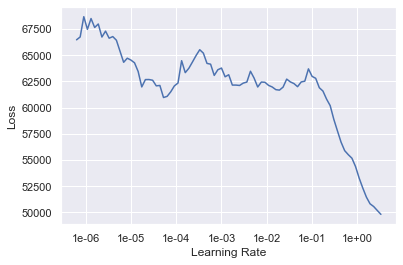

In [150]:
# we typically find the point where the slope is steepest
learn.recorder.plot()

In [151]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr=slice(2e-01))

# Analyse our model
learn.model
learn.recorder.plot_losses()

RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'other'

In [158]:
data.one_batch

<bound method DataBunch.one_batch of TabularDataBunch;

Train: LabelList (1038040 items)
x: TabularList
Hour 3; Month 1; Day 1; Year 2015; Direct radiation [W/m**2] -0.4782; Diffuse radiation [W/m**2] -0.6480; Long-wave downward radiation [W/m**2] 0.2986; Air temperature [deg C] -0.8471; Humidity, relative [%] 1.1772; Station pressure [hPa] 1.6242; ,Hour 3; Month 1; Day 1; Year 2015; Direct radiation [W/m**2] -0.4782; Diffuse radiation [W/m**2] -0.6480; Long-wave downward radiation [W/m**2] 0.2986; Air temperature [deg C] -0.8471; Humidity, relative [%] 1.1772; Station pressure [hPa] 1.6242; ,Hour 3; Month 1; Day 1; Year 2015; Direct radiation [W/m**2] -0.4782; Diffuse radiation [W/m**2] -0.6480; Long-wave downward radiation [W/m**2] 0.2986; Air temperature [deg C] -0.8347; Humidity, relative [%] 1.1772; Station pressure [hPa] 1.6242; ,Hour 3; Month 1; Day 1; Year 2015; Direct radiation [W/m**2] -0.4782; Diffuse radiation [W/m**2] -0.6480; Long-wave downward radiation [W/m**2] 0.2986; 

In [147]:
basic_radiation.query("~((`Year`==2016) & (`Month`==12) & (20 < `Day` < 31))")

Short-wave downward (GLOBAL) radiation [W/m**2]  \
Date/Time                                                              
2015-01-01 00:00:00                                              1.0   
2015-01-01 00:01:00                                              0.0   
2015-01-01 00:02:00                                              0.0   
2015-01-01 00:03:00                                              0.0   
2015-01-01 00:04:00                                              1.0   
...                                                              ...   
2016-12-31 23:55:00                                              0.0   
2016-12-31 23:56:00                                              0.0   
2016-12-31 23:57:00                                              0.0   
2016-12-31 23:58:00                                              0.0   
2016-12-31 23:59:00                                              0.0   

                     Direct radiation [W/m**2]  Diffuse radiation [W/m**2]  \
Date/Time                                                                    
2015-01-01 00:00:00                        0.0                         1.0   
2015-01-01 00:01:00                        0.0                         1.0   
2015-01-01 00:02:00                        0.0                         1.0   
2015-01-01 00:03:00                        0.0                         1.0   
2015-01-01 00:04:00                        0.0                         1.0   
...                                        ...                         ...   
2016-12-31 23:55:00                        0.0                         1.0   
2016-12-31 23:56:00                        0.0                         1.0   
2016-12-31 23:57:00                        0.0                         1.0   
2016-12-31 23:58:00                        0.0                         1.0   
2016-12-31 23:59:00                        0.0                         1.0   

                     Long-wave downward radiation [W/m**2]  \
Date/Time                                                    
2015-01-01 00:00:00                                  335.0   
2015-01-01 00:01:00                                  335.0   
2015-01-01 00:02:00                                  335.0   
2015-01-01 00:03:00                                  335.0   
2015-01-01 00:04:00                                  335.0   
...                                                    ...   
2016-12-31 23:55:00                                  325.0   
2016-12-31 23:56:00                                  324.0   
2016-12-31 23:57:00                                  324.0   
2016-12-31 23:58:00                                  325.0   
2016-12-31 23:59:00                                  324.0   

                     Air temperature [deg C]  Humidity, relative [%]  \
Date/Time                                                              
2015-01-01 00:00:00                      3.9                    99.0   
2015-01-01 00:01:00                      3.9                    99.0   
2015-01-01 00:02:00                      3.9                    99.0   
2015-01-01 00:03:00                      4.0                    99.0   
2015-01-01 00:04:00                      3.9                    99.0   
...                                      ...                     ...   
2016-12-31 23:55:00                      1.7                    91.0   
2016-12-31 23:56:00                      1.7                    90.0   
2016-12-31 23:57:00                      1.7                    90.0   
2016-12-31 23:58:00                      1.7                    90.0   
2016-12-31 23:59:00                      1.7                    90.0   

                     Station pressure [hPa]  Hour  Month  Day  Year  
Date/Time                                                            
2015-01-01 00:00:00                  1013.0     0      1    1  2015  
2015-01-01 00:01:00                  1013.0     0      1    1  2015  
2015-01-01 00:02:00                  1013.0  

In [164]:
basic_radiation.groupby("Month").agg({"Short-wave downward (GLOBAL) radiation [W/m**2]":np.mean})

Short-wave downward (GLOBAL) radiation [W/m**2]
Month                                                 
1                                            26.481485
2                                            63.926535
3                                            99.378517
4                                           178.827870
5                                           223.713519
6                                           238.345718
7                                           225.884453
8                                           207.501075
9                                           151.528252
10                                           64.352207
11                                           36.023889
12                                           24.879167